**Importing libraries**

In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.stattools import jarque_bera
import datetime
from warnings import filterwarnings
filterwarnings('ignore')
#pd.options.display.max_columns = None
#pd.options.display.max_rows = None

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import files
uploaded1 = files.upload()

Saving Location Code (1).csv to Location Code (1).csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving CAPSTONE DATASET.csv to CAPSTONE DATASET.csv


In [ ]:
import io
  
data = pd.read_csv(io.BytesIO(uploaded['CAPSTONE DATASET.csv']), encoding = "ISO-8859-1")
print(data)

           case_id  impact  ... bin_check_tat vendor_tat
0        301960037       5  ...           NaN       5.38
1        302151596       5  ...          3.83        NaN
2        302160470       5  ...           NaN        NaN
3        302165269       5  ...           NaN        NaN
4        302165893       5  ...          2.21        NaN
...            ...     ...  ...           ...        ...
206405   600204683       5  ...           NaN        NaN
206406   600211219       5  ...           NaN        NaN
206407   600759813       5  ...           NaN        NaN
206408   600760552       5  ...           NaN        NaN
206409  E105854944       4  ...           NaN        NaN

[206410 rows x 26 columns]


In [ ]:
# Read and display data to get insights from the data
# data = pd.read_excel('CAPSTONE DATASET.xlsx')

In [ ]:
data.head()

,case_id,impact,category,type,item,assigned_to_group,assigned_to_individual,status,ticket_create_date,ticket_resolved_date,building_id,quantity,asin,upc,vendor_id,purchase_order_id,root_cause,t_root_cause_details,title,total_tat,rbs_tat,cat_push_tat,fc_receive_tat,fc_actionable_tat,bin_check_tat,vendor_tat
0,301960037,5,iss,Prime Now,High Unit Overage/Misship,ISS-UK-RBS,iss-uk-rbs-team,Closed,02-01-2020 18:18,09-01-2020 13:14,HUK3,NaN,NaN,5.01002E+12,9K010,NaN,FC error,NaN,Laphroaig 10 Year Old Islay Single Malt Scotch...,6.79,0.92,NaN,0.00,0.5,NaN,5.38
1,302151596,5,iss,BWS,Image Update,ISS-UK-RBS,iss-uk-rbs-team,Closed,06-01-2020 22:05,23-01-2020 13:58,BHX5,1.0,B07G8P8KM3,9.31122E+12,TRH5R,2C45AZ4H,Incorrect primary/secondary image,NaN,Lindeman's Bin 85 Pinot Grigio 2019 White Wine...,16.63,12.71,0.08,0.00,NaN,3.83,NaN
2,302160470,5,iss,Fulfilled By Amazon,C-Return,EDI4-CReturns- Pending tickets,dswanso,Closed,06-01-2020 23:50,07-01-2020 05:38,EDI4,1.0,X00139YXSP,B07YKKJ29S,-,202-8643607-7319553,CR-Defective item/Incomplete set,NaN,"Red Barn Value Bird Fat Ball Cage Feeder, Bird...",0.25,0.25,NaN,0.00,NaN,NaN,NaN
3,302165269,5,iss,Pantry,No PO Found,ISS-UK-RBS,hortap,Closed,07-01-2020 00:59,09-01-2020 09:17,LBA3,18.0,B01FFPI4K2,5.01055E+12,unknown,NO PO,Vendor misshipment - Item not ordered for,NaN,Morland Old Golden Hen Refreshing Crafted Beer...,2.38,1.17,NaN,1.21,NaN,NaN,NaN
4,302165893,5,Distribution Center,EDI4 C-Returns,Customer Returns,EDI4-CReturns- Pending tickets,hstacey,Closed,07-01-2020 01:04,10-01-2020 01:26,EDI4,1.0,B00716R4LE,5.7003E+12,CAPLF,026-8752236-2304305,NaN,NaN,Pandora Women's 925 Sterling Silver Charm,3.00,0.71,NaN,0.08,NaN,2.21,NaN


**Data Analysis and Understanding**

In [ ]:
# Data Understanding
data.shape

(206410, 26)

In [ ]:
# The dataset has 2,06,410 records and 26 attributes.

In [ ]:
# Data types
data.dtypes

case_id                    object
impact                      int64
category                   object
type                       object
item                       object
assigned_to_group          object
assigned_to_individual     object
status                     object
ticket_create_date         object
ticket_resolved_date       object
building_id                object
quantity                  float64
asin                       object
upc                        object
vendor_id                  object
purchase_order_id          object
root_cause                 object
t_root_cause_details       object
title                      object
total_tat                 float64
rbs_tat                   float64
cat_push_tat              float64
fc_receive_tat            float64
fc_actionable_tat         float64
bin_check_tat             float64
vendor_tat                float64
dtype: object

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206410 entries, 0 to 206409
Data columns (total 26 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   case_id                 206410 non-null  object 
 1   impact                  206410 non-null  int64  
 2   category                206410 non-null  object 
 3   type                    206410 non-null  object 
 4   item                    206410 non-null  object 
 5   assigned_to_group       206410 non-null  object 
 6   assigned_to_individual  206410 non-null  object 
 7   status                  206410 non-null  object 
 8   ticket_create_date      206410 non-null  object 
 9   ticket_resolved_date    206243 non-null  object 
 10  building_id             206398 non-null  object 
 11  quantity                204010 non-null  float64
 12  asin                    204269 non-null  object 
 13  upc                     195996 non-null  object 
 14  vendor_id           

In [ ]:
# All the data types of the features are correctly identified.

In [ ]:
# 'rbs_tat' is the target variable.

In [ ]:
# 'impact','quantity','total_tat','rbs_tat','cat_push_tat','fc_receive_tat','fc_actionable_tat','bin_check_tat',
# 'vendor_tat' are the numerical columns in the dataset.

In [ ]:
# 'case_id','category','type','item','assigned_to_group','assigned_to_individual','status','building_id','asin','upc',
# 'vendor_id','purchase_order_id','root_cause','t_root_cause_details','title' are the categorical columns in the dataset.

**Summary statistics**

In [ ]:
# Five point summary for numerical attributes:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
impact,206410.0,4.527373,0.672039,2.0,4.00,5.00,5.00,5.00
quantity,204010.0,53.507916,505.036151,0.0,1.00,1.00,12.00,99999.00
total_tat,206243.0,9.495214,8.368932,0.0,3.75,7.25,13.75,591.58
rbs_tat,206107.0,6.636157,6.509710,0.0,1.58,4.75,10.00,250.75
cat_push_tat,24843.0,1.381854,2.748412,0.0,0.13,0.33,1.13,43.92
fc_receive_tat,198743.0,0.637034,1.685543,0.0,0.04,0.21,0.63,136.96
fc_actionable_tat,25255.0,1.029288,2.692811,0.0,0.13,0.38,1.21,232.25
bin_check_tat,82810.0,3.238931,3.675996,0.0,1.04,2.46,4.21,168.96
vendor_tat,17366.0,5.227034,4.466648,0.0,2.13,4.29,6.67,53.00


In [ ]:
# 'impact'        : minimum value is 2 and maximum value is 5.
# 'total_tat'     : minimum value is 0 and maximum value is 591. 
# 'rbs_tat'       : minimum value is 0 and maximum value is 250.
# 'bin_check_tat' : minimum value is 0 and maximum value is 168.
# 'vendor_tat'    : minimum value is 0 and maximum value is 53.
# High standard deviation is present in 'quantity'

In [ ]:
# Five point summary for categorical attributes:
data.describe(include = object).T

,count,unique,top,freq
case_id,206410,206410,545929221,1
category,206410,18,iss,126416
type,206410,94,EDI4 C-Returns-FBA,46061
item,206410,38,Customer Returns,76612
assigned_to_group,206410,4,ISS-UK-RBS,128638
assigned_to_individual,206410,71,hstacey,48565
status,206410,2,Closed,201551
ticket_create_date,206410,179301,05-08-2020 11:41,9
ticket_resolved_date,206243,170309,22-12-2020 17:14,14
building_id,206398,205,EDI4,77613


In [ ]:
# 'item'        : 'Customer returns' class has 76,612 enteries.
# 'building_id' : This refers to warehouse where EDI4 has more number of observations.
# 'root_cause'  : Vendor misshipment has most observations.

**Missing Values Analysis**

In [ ]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum())/data.isnull().count().sort_values(ascending=False)*100
missing_data = pd.concat([total, percent], axis=1, keys=['Total','Percent'], sort=False).sort_values('Total', ascending=False)
missing_data

,Total,Percent
t_root_cause_details,192395,93.210116
vendor_tat,189044,91.586648
cat_push_tat,181567,87.964246
fc_actionable_tat,181155,87.764643
bin_check_tat,123600,59.880820
root_cause,45060,21.830338
vendor_id,12859,6.229834
upc,10414,5.045298
purchase_order_id,8073,3.911148
fc_receive_tat,7667,3.714452


In [ ]:
# There are missing values present in the dataset.

**Feature Analysis  and Cleaning**

'case_id' attribute

In [ ]:
data['case_id'].dtype

dtype('O')

In [ ]:
data['impact'] = data['impact'].astype(object)

In [ ]:
data['case_id'].isnull().sum()

0

In [ ]:
data['case_id'].duplicated().sum()

0

In [ ]:
# There are no missing values in the 'case_id' attribute.
# All the case ids are unique.

'impact' attribute

In [ ]:
data['impact'].dtype

dtype('O')

In [ ]:
data['impact'].isnull().sum()

0

In [ ]:
data['impact'].value_counts()

5    129741
4     55784
3     20884
2         1
Name: impact, dtype: int64

In [ ]:
# There are no missing values in the 'impact' attribute.

'category' attribute


In [ ]:
data['category'].dtype

dtype('O')

In [ ]:
data['category'].isnull().sum()

0

In [ ]:
data['category'].value_counts()

iss                    126416
Distribution Center     76909
F3 EU ISS                3046
RBS                        16
iss-fc                      6
FBA                         5
ICQA                        1
i18n                        1
Waffle                      1
Customer Returns            1
Retail                      1
DISTRIBUTION CENTER         1
flex-hyd-leads              1
D1-UK-AWS                   1
RME                         1
Outbound                    1
FC                          1
ISP Decom-EMEA              1
Name: category, dtype: int64

In [ ]:
# There are some classes in 'category' attribute which are of the same significance. 
# Thus, we have merged them under the one main head.

In [ ]:
def replaced_value(col,itemName,replaced):
    data[col].replace(itemName,replaced,inplace = True)
itemName = ['iss-fc','icqa','ICQA','RBS']    
replaced_value('category',itemName,'iss')


def replaced_value(col,itemName,replaced):
    data[col].replace(itemName,replaced,inplace = True)
itemName = ['DISTRIBUTION CENTER']    
replaced_value('category',itemName,'Distribution Center')

In [ ]:
# There are some categories in 'category' attribute which have very less values. 
# Thus, we have dropped them.

In [ ]:
data[(data['category'] == 'FBA')|(data['category'] == 'Customer Returns')|(data['category'] == 'i18n')
     |(data['category'] == 'Retail')|(data['category'] == 'flex-hyd-leads')|(data['category'] == 'Waffle')
     |(data['category'] == 'RME')|(data['category'] == 'ISP Decom-EMEA')|(data['category'] == 'Outbound')
     |(data['category'] == 'D1-UK-AWS')|(data['category'] == 'FC')].index

data = data.drop(index = [950,4300,15972,35376,55661,56750,83514,91169,117716,120385,120551,155441,164506,196246,95691])

'type' attribute

In [ ]:
data['type'].dtype

dtype('O')

In [ ]:
data['type'].isnull().sum()

0

In [ ]:
data['type'].value_counts()

EDI4 C-Returns-FBA      46061
EDI4 C-Returns          29668
Home                    17277
Grocery                 15717
Health Personal Care    11277
                        ...  
FBA IN Toys                 1
Berrio                      1
LBA1 Configuration          1
XBRZ                        1
EDI4-C-Returns              1
Name: type, Length: 92, dtype: int64

In [ ]:
# There are some classes in 'type' attribute which are of the same significance. 
# Thus, we have merged them under the one main head.

In [ ]:
def replaced_value(col,itemName,replaced):
    data[col].replace(itemName,replaced,inplace = True)
itemName = ['Apparel Intimate','SL Private Label','Softlines - Private Brands']    
replaced_value('type',itemName,'Apparel')


def replaced_value(col,itemName,replaced):
    data[col].replace(itemName,replaced,inplace = True)
itemName = ['Jewellry','Jewelry','Watches','Luggage','Eyewear']    
replaced_value('type',itemName,'Jewellery')


def replaced_value(col,itemName,replaced):
    data[col].replace(itemName,replaced,inplace = True)
itemName = ['Pet Products']    
replaced_value('type',itemName,'Pet')


def replaced_value(col,itemName,replaced):
    data[col].replace(itemName,replaced,inplace = True)
itemName = ['EDI4 C-Returns-FBA','ES-Customer Return','Customer Returns']    
replaced_value('type',itemName,'EDI4 C-Returns')


def replaced_value(col,itemName,replaced):
    data[col].replace(itemName,replaced,inplace = True)
itemName = ['PrimeNow','UK-Customer Return','Customer Service Andon Cord','Berrio','Fulfilled By Amazon']    
replaced_value('type',itemName,'Prime Now')


def replaced_value(col,itemName,replaced):
    data[col].replace(itemName,replaced,inplace = True)
itemName = ['Musical Instruments']    
replaced_value('type',itemName,'Music')


def replaced_value(col,itemName,replaced):
    data[col].replace(itemName,replaced,inplace = True)
itemName = ['Retail request']    
replaced_value('type',itemName,'Retail')


def replaced_value(col,itemName,replaced):
    data[col].replace(itemName,replaced,inplace = True)
itemName = ['Sports Apparel','Sports Intimate']    
replaced_value('type',itemName,'Sporting Goods')


def replaced_value(col,itemName,replaced):
    data[col].replace(itemName,replaced,inplace = True)
itemName = ['FBA IN Toys','FBA Ops FR']    
replaced_value('type',itemName,'Toys')


def replaced_value(col,itemName,replaced):
    data[col].replace(itemName,replaced,inplace = True)
itemName = ['Video/DVD','Software']    
replaced_value('type',itemName,'Video Games')


def replaced_value(col,itemName,replaced):
    data[col].replace(itemName,replaced,inplace = True)
itemName = ['Perfumes']    
replaced_value('type',itemName,'Beauty')


def replaced_value(col,itemName,replaced):
    data[col].replace(itemName,replaced,inplace = True)
itemName = ['Advantage']    
replaced_value('type',itemName,'Books')


def replaced_value(col,itemName,replaced):
    data[col].replace(itemName,replaced,inplace = True)
itemName = ['Wine']    
replaced_value('type',itemName,'BWS')


def replaced_value(col,itemName,replaced):
    data[col].replace(itemName,replaced,inplace = True)
itemName = ['Kitchen Appliances','Large Appliances','Major Appliances']    
replaced_value('type',itemName,'Kitchen')


def replaced_value(col,itemName,replaced):
    data[col].replace(itemName,replaced,inplace = True)
itemName = ['Home Entertainment','Home Improvement','Outdoors','Industrial & Scientific','Tools','BISS','Furniture',
            'General','GL']    
replaced_value('type',itemName,'Home')


def replaced_value(col,itemName,replaced):
    data[col].replace(itemName,replaced,inplace = True)
itemName = ['Digital Accessories','Digital Products 9 Accessory','Camera','Mobile Electronics','Personal Computers',
            'Wireless','PC store']    
replaced_value('type',itemName,'CE')


def replaced_value(col,itemName,replaced):
    data[col].replace(itemName,replaced,inplace = True)
itemName = ['Health Personal Care Intimate','Health & Personal Care Intimate']    
replaced_value('type',itemName,'Health Personal Care')


def replaced_value(col,itemName,replaced):
    data[col].replace(itemName,replaced,inplace = True)
itemName = ['Shoes']    
replaced_value('type',itemName,'Footwear')


def replaced_value(col,itemName,replaced):
    data[col].replace(itemName,replaced,inplace = True)
itemName = ['Pantry','Grocery Food','fresh_ambient','Dabba']    
replaced_value('type',itemName,'Grocery')


def replaced_value(col,itemName,replaced):
    data[col].replace(itemName,replaced,inplace = True)
itemName = ['Fulfilled By Amazon']    
replaced_value('type',itemName,'EDI4 C-Returns-FBA')


def replaced_value(col,itemName,replaced):
    data[col].replace(itemName,replaced,inplace = True)
itemName = ['EDE4-C-Return','EDI4 C-Returns-CS','EDI4 C-Returns-Retail','EDI4-C-Returns','CE','Customer Returns','EU RELO FIN',
           'EUK5 5s','Home','Labor Event Service','LBA1 Configuration','LBA8-Security','MME1-ICQA','Musical Instruments',
            'Toys','XBRZ']    
replaced_value('type',itemName,'EDI4 C-Returns')


def replaced_value(col,itemName,replaced):
    data[col].replace(itemName,replaced,inplace = True)
itemName = ['BWS','Grocery','Health Personal Care']    
replaced_value('type',itemName,'UK AmazonFresh')

'item' attribute

In [ ]:
data['item'].dtype

dtype('O')

In [ ]:
data['item'].isnull().sum()

0

In [ ]:
# There are some classes in 'item' attribute which are of the same significance. 
# Thus, we have merged them under the one main head.

In [ ]:
def replaced_value(col,itemName,replaced):
    data[col].replace(itemName,replaced,inplace = True)
itemName = ['Barcode Links Multiple product IDs','Barcode links multiple items','Barcode Links Multiple ASINs',
            'Barcode links multiple ASIN']    
replaced_value('item',itemName,'Barcode links multiple product ID')


def replaced_value(col,itemName,replaced):
    data[col].replace(itemName,replaced,inplace = True)
itemName = ['Barcode links wrong item','Barcode links to wrong ASIN','Barcode Links Wrong Item']    
replaced_value('item',itemName,'Barcode links to wrong product ID')


def replaced_value(col,itemName,replaced):
    data[col].replace(itemName,replaced,inplace = True)
itemName = ['Binding Update','Bundling Issues']    
replaced_value('item',itemName,'Barcode not linked')


def replaced_value(col,itemName,replaced):
    data[col].replace(itemName,replaced,inplace = True)
itemName = ['C-Return','Customer Return Mismatch','CR Aging Tickets']    
replaced_value('item',itemName,'Customer Returns')


def replaced_value(col,itemName,replaced):
    data[col].replace(itemName,replaced,inplace = True)
itemName = ['Detail Page Update','Image Update']    
replaced_value('item',itemName,'Detail Page Issue')


def replaced_value(col,itemName,replaced):
    data[col].replace(itemName,replaced,inplace = True)
itemName = ['Overage']    
replaced_value('item',itemName,'High Unit Overage/Misship')


def replaced_value(col,itemName,replaced):
    data[col].replace(itemName,replaced,inplace = True)
itemName = ['No PO Found - No Problem Slip','No PO Found - Vendor Caused','Not On PO','No PO found - No Problem slip']    
replaced_value('item',itemName,'No PO Found')


def replaced_value(col,itemName,replaced):
    data[col].replace(itemName,replaced,inplace = True)
itemName = ['Barcode not found']    
replaced_value('item',itemName,'Vendor Compliance')


def replaced_value(col,itemName,replaced):
    data[col].replace(itemName,replaced,inplace = True)
itemName = ['Wrong Temperature Type']    
replaced_value('item',itemName,'Wrong Temperature')


def replaced_value(col,itemName,replaced):
    data[col].replace(itemName,replaced,inplace = True)
itemName = ['Case Pack/Multi-box Issues']    
replaced_value('item',itemName,'Case Pack/Multi-Box Issues')


def replaced_value(col,itemName,replaced):
    data[col].replace(itemName,replaced,inplace = True)
itemName = ['Item Not in Catalog']    
replaced_value('item',itemName,'Item Not In Catalog')

'assigned_to_group' attribute

In [ ]:
data['assigned_to_group'].dtype

dtype('O')

In [ ]:
data['assigned_to_group'].isnull().sum()

0

In [ ]:
data['assigned_to_group'].value_counts()

ISS-UK-RBS                        128626
EDI4-CReturns- Pending tickets     77629
EU-Cust-Return                       136
C-ReturnsCWL1                          4
Name: assigned_to_group, dtype: int64

In [ ]:
# We have considered 'CWL1' from 'building_id' attribute and replaced ISS-UK-RBS from 'assigned_to_group' attribute, with 'CWL1-CReturns'.
# These cases are resolved under the wrong assigned group.
# They were supposed to be resolved under 'CWL1-CReturns' from 'assigned_to_group' attribute.
data['assigned_to_group'] = np.where(data['building_id'] == 'CWL1','CWL1-CReturns',data['assigned_to_group'] )

In [ ]:
# Since the 'C-ReturnsCWL1' class is a data entry error, it has been clubbed under 'CWL1-CReturns'.
data['assigned_to_group'] = np.where(data['assigned_to_group']  == 'C-ReturnsCWL1','CWL1-CReturns',data['assigned_to_group'])

In [ ]:
index_assign = data[(data['assigned_to_group'] == 'EU-Cust-Return')].index

In [ ]:
data.drop(index = index_assign,inplace = True)

In [ ]:
data.groupby('assigned_to_group')['case_id'].count()

assigned_to_group
CWL1-CReturns                      20867
EDI4-CReturns- Pending tickets     77629
ISS-UK-RBS                        107803
Name: case_id, dtype: int64

'assigned_to_individual' attribute

In [ ]:
data['assigned_to_individual'].dtype

dtype('O')

In [ ]:
data['assigned_to_individual'].isnull().sum()

0

In [ ]:
data['assigned_to_individual'].value_counts()

hstacey                 48564
iss-uk-rbs-team         28477
Assign-To-Automation    21997
nazehdai                19652
mmamath                  8747
                        ...  
denisemo                    1
ISS-UK-SeSu                 1
clarero                     1
pedith                      1
marijaa                     1
Name: assigned_to_individual, Length: 71, dtype: int64

In [ ]:
# There are some classes in 'assigned_to_individual' attribute which are of the same significance. 
# Thus, we have merged them under the one main head.

In [ ]:
itemName = ['aashwi','agreenwa','amithubl','arembias','arrembi','ashashet','asmegan','bhijit','broglark','clarero',
            'denisemo','derekr','dfedotov','dhanyae','dianed','dswanso','gferguso','ghogg','gregmurr','hortap','hstacey',
            'hughm','iss-bulk-resolution','iss-uk-rbs-team','ISS-UK-SeSu','jainmana','jemmat','josehone','kaabhsh','kancherg',
            'kavyac','kellings','kolekarn','marijaa','maryseld','masoodf','mbbuchan','mchranj','mmamath','mmetha','mnismmm',
            'nazehdai','nithd','oharaa','pedith','pkramazr','ppragat','pravikm','punin','rajsv','rmanju','sahas','scomc',
            'selvagae',	'sggodfre','shirla','shraamin','shwetab','slaura','spaterno','sswthi','susaid','sushmip','swathrao',
            'tejithah','vargheb','vismayap','wardrory','zinniaz']
def replaced_value(col,itemName,replaced):
    data[col].replace(itemName,replaced,inplace = True)
replaced_value('assigned_to_individual',itemName,'Assign-To-Manual')

'status' attribute

In [ ]:
data['status'].dtype

dtype('O')

In [ ]:
data['status'].isnull().sum()

0

In [ ]:
data['status'].value_counts()

Closed      201440
Resolved      4859
Name: status, dtype: int64

'ticket_create_date' attribute

In [ ]:
data['ticket_create_date'].dtype

dtype('O')

In [ ]:
data['ticket_create_date'].isnull().sum()

0

In [ ]:
data['ticket_create_date'].value_counts()

05-08-2020 11:41    9
05-08-2020 11:42    6
06-11-2020 04:52    6
17-12-2020 20:23    5
26-11-2020 10:49    5
                   ..
06-04-2020 09:15    1
18-01-2021 05:16    1
14-12-2020 14:51    1
12-02-2021 10:33    1
18-02-2021 21:26    1
Name: ticket_create_date, Length: 179213, dtype: int64

In [ ]:
# The day and month names are extracted from the date into a new dataframe.
df = pd.DataFrame()
df['date'] = pd.to_datetime(data['ticket_create_date']).dt.date
df['time'] = pd.to_datetime(data['ticket_create_date']).dt.time
df['date'].head()
df1 = pd.concat([df['date'], df['time']], axis=1)
df1['date'] = pd.to_datetime(df1['date'])
df1['dayname'] = df1['date'].dt.day_name()
df1['dayname'].sample(5)
data['assigned_day']=df1['dayname']
data['assigned_day'].head()

0     Saturday
1       Monday
2       Monday
3    Wednesday
4    Wednesday
Name: assigned_day, dtype: object

In [ ]:
df1.head()

,date,time,dayname
0,2020-02-01,18:18:00,Saturday
1,2020-06-01,22:05:00,Monday
2,2020-06-01,23:50:00,Monday
3,2020-07-01,00:59:00,Wednesday
4,2020-07-01,01:04:00,Wednesday


In [ ]:
df['date'] = pd.to_datetime(data['ticket_create_date']).dt.date
df['time'] = pd.to_datetime(data['ticket_create_date']).dt.time
df['date'].head()
df3 = pd.concat([df['date'], df['time']], axis=1)
df3['date'] = pd.to_datetime(df3['date'])
df3['monthname'] = df3['date'].dt.month_name()
df3['monthname'].sample(5)
data['assigned_month']=df3['monthname']
data['assigned_month'].head()

0    February
1        June
2        June
3        July
4        July
Name: assigned_month, dtype: object

'ticket_resolved_date' attribute

In [ ]:
data['ticket_resolved_date'].dtype

dtype('O')

In [ ]:
data['ticket_resolved_date'].isnull().sum()

167

In [ ]:
data['ticket_resolved_date'].value_counts()

22-12-2020 17:14    14
20-05-2020 02:46    12
11-06-2020 09:05    11
27-05-2021 15:17    10
22-12-2020 17:24     9
                    ..
10-02-2021 04:17     1
23-09-2020 08:56     1
03-08-2021 22:27     1
29-04-2021 14:38     1
26-06-2021 08:40     1
Name: ticket_resolved_date, Length: 170225, dtype: int64

In [ ]:
df = pd.DataFrame()
df['date'] = pd.to_datetime(data['ticket_resolved_date']).dt.date
df['time'] = pd.to_datetime(data['ticket_resolved_date']).dt.time
df['date'].head()
df2 = pd.concat([df['date'], df['time']], axis=1)
df2['date'] = pd.to_datetime(df2['date'])
df2['dayname'] = df2['date'].dt.day_name()
data['resolved_day']=df2['dayname']
data['resolved_day'].head()

0      Tuesday
1     Thursday
2    Wednesday
3      Tuesday
4     Thursday
Name: resolved_day, dtype: object

In [ ]:
df['date'] = pd.to_datetime(data['ticket_resolved_date']).dt.date
df['time'] = pd.to_datetime(data['ticket_resolved_date']).dt.time
df['date'].head()
df4 = pd.concat([df['date'], df['time']], axis=1)
df4['date'] = pd.to_datetime(df4['date'])
df4['monthname'] = df4['date'].dt.month_name()
data['resolved_month']=df4['monthname']
data['resolved_month'].head()

0    September
1      January
2         July
3    September
4      October
Name: resolved_month, dtype: object

In [ ]:
data = data.dropna(subset = ['ticket_resolved_date','resolved_day','resolved_month'])  

In [ ]:
data[['ticket_resolved_date','resolved_day','resolved_month']].isnull().sum()

ticket_resolved_date    0
resolved_day            0
resolved_month          0
dtype: int64

'building_id' attribute

In [ ]:
data['building_id'].dtype

dtype('O')

In [ ]:
data['building_id'].isnull().sum()

12

In [ ]:
data['building_id'].value_counts()

EDI4    77559
CWL1    20860
BHX4    14128
BHX1    11548
LCY2    10954
        ...  
AUA5        1
Mans        1
SATA        1
Symm        1
MAN7        1
Name: building_id, Length: 201, dtype: int64

In [ ]:
data = data.dropna(subset = ['building_id'])  

In [ ]:
data[data['building_id'] == datetime.datetime(2021, 1, 7, 0, 0)]['building_id'].index

Int64Index([], dtype='int64')

In [ ]:
data.drop(index = [579,1513,1842,13202,15375,52633,65014,91848,105053,131694,143134,194357,195354],inplace = True)

In [ ]:
# These are the classes having value counts less than 1000.
# Also, there are incorrect numerical ids and names given.
# All these are removed.
list1 = ['LBA1','HUK3', 'Virt', 'GLA1', 'LTN2', 'XBH2', 'DEL1', 'DXE1', 'XBH1', 'BHX7', 'UUK3', 'EUKD', 'BLR1', 'ULO6', 'UMC2',
         'HYD1','BTS2', 'EDI7', 'ULI2', 'LTN7', 'ULI1', 'MAA2', 'EUKA', 'EUKB', 'LHR1', 'CGN1', 'ORK1', 'UUK2', 'EMA3', 'KTW1',
         'ULS1','LTN9', 'UGL1', 'UUK1', 'UPO1', 'CPT2', 'ULO1', 4397 ,'DXB1', 'ULO5', 'CEB1', 'USH1', 'UNW1', 'BLR2', 'VEDC', 
         'XLT1',44203, 'NRT1', 'AMM1', 'Amaz', 'EMA7', 'EDI3', 'XLT2', 'MAD4', 'XUKN', 'Cork', 'CVG1', 'LUX2', 'PRG2', 'UNW2', 
         'XBH3',1276 ,1706, 'AUA8', 'CJB1', 'HMA6', 'PUKC', 'VEPT', 'XCRC', 7692 ,9984 ,'DEX1', 'Germ', 'LCJ2', 'LCY3', 'MNL1', 
         'MUC5','NRT5', 'SJO1', 'VCC ', 'VEAF', 'XPL1', 3502 ,4052, 6374, 'BER1', 'CDG1', 'DMK1', 'DXB3', 'IND9', 'MUC3',
         'ONT8','POZ1', 'SEA8', 'VEPL', 'WRO2', 1272, 1300 ,4024 ,4401, 5512 ,6539 ,7568, 8889 ,'AMS1', 'AUA2', 'AUA4', 'AUA5',
         'BCN1','BLR3', 'BTS1', 'Cana', 'CHA1', 'CLT2', 'CMH3', 'CVG2', 'DAL4', 'DBN2', 'DCA1', 'DCF1', 'DHA1', 'DHA2', 'DHA3', 
         'DRM2','DTK3', 'DTM2', 'DWA1', 'DWN1', 'DZL7', 'EUKE', 'FCO1', 'FRA3', 'GDN1', 'HND3', 'IBH4', 'ILO5', 'Indi', 'JED3',
         'KIX5','LAS7', 'LAX9', 'LCJ4', 'LGB8', 'LHR6', 'LHR8', 'LIL1', 'LIN1', 'LUX1', 'MAN7', 'Mans', 'MUC2', 'None', 'PSC1',
         'SAT1','SATA', 'SCCA', 'SEA3', 'SEA5', 'SEA7', 'SIN1', 'SIN8', 'SMF3', 'SYD1', 'Symm', 'SZZ1', 'UDR4', 'UNJ1', 'USC1',
         'VEED','VEGF', 'VEGI', 'VEIA', 'VEIH', 'VELA', 'VETY', 'WRO5', 'ZRH5']

for i in list1:
    data.drop(index = data[data['building_id'] == i]['building_id'].index,inplace = True)

In [ ]:
import io
  
building = pd.read_csv(io.BytesIO(uploaded1['Location Code (1).csv']), encoding = "ISO-8859-1")
print(building)

   building_id                   Building Location
0         EDI4                        Dunfermline 
1         CWL1                             Swansea
2         BHX4                           Coventry 
3         BHX1                       Staffordshire
4         LCY2                             Tilbury
5         BRS1  Western Approach Distribution Park
6         EUK5                        Peterborough
7         MME2                             Durham 
8         BHX5                              Rugby 
9         EMA1                            Kegworth
10        MME1                         Darlington 
11        MAN4                       Chesterfield 
12        MAN3                             Bolton 
13        LTN4                          Dunstable 
14        LBA2                          Doncaster 
15        MAN2                         Warrington 
16        LTN1                        Bedfordshire
17        PNQ1                                Pune
18        HUK5                 

In [ ]:
#building = pd.read_excel('Location Code (1).xlsx')
data = data.merge(building,left_on = 'building_id',right_on='building_id')
data.head()

,case_id,impact,category,type,item,assigned_to_group,assigned_to_individual,status,ticket_create_date,ticket_resolved_date,building_id,quantity,asin,upc,vendor_id,purchase_order_id,root_cause,t_root_cause_details,title,total_tat,rbs_tat,cat_push_tat,fc_receive_tat,fc_actionable_tat,bin_check_tat,vendor_tat,assigned_day,assigned_month,resolved_day,resolved_month,Building Location
0,302151596,5,iss,UK AmazonFresh,Detail Page Issue,ISS-UK-RBS,Assign-To-Manual,Closed,06-01-2020 22:05,23-01-2020 13:58,BHX5,1.0,B07G8P8KM3,9.31122E+12,TRH5R,2C45AZ4H,Incorrect primary/secondary image,NaN,Lindeman's Bin 85 Pinot Grigio 2019 White Wine...,16.63,12.71,0.08,0.00,NaN,3.83,NaN,Monday,June,Thursday,January,Rugby
1,302209600,5,iss,UK AmazonFresh,Detail Page Issue,ISS-UK-RBS,Assign-To-Manual,Closed,07-01-2020 09:30,31-01-2020 12:36,BHX5,40.0,B01N1LSCN1,5.06047E+12,OSRGV,5X27SBBH,Incorrect primary/secondary image,NaN,Wholefood Earth Sodium Bicarbonate Baking Soda...,24.13,12.33,0.13,1.92,NaN,3.83,5.92,Wednesday,July,Friday,January,Rugby
2,302252204,5,iss,UK AmazonFresh,Detail Page Issue,ISS-UK-RBS,Assign-To-Manual,Closed,07-01-2020 16:25,23-01-2020 02:41,BHX5,4.0,B00OP2WR32,8.03412E+12,NOU5X,5GDMFHDO,Incorrect title of an item,NaN,"Purato Nero d'Avola Organic Wine, 75 cl (Case ...",15.42,14.71,NaN,0.58,NaN,0.13,NaN,Wednesday,July,Thursday,January,Rugby
3,302978444,5,iss,Books,Title Update,ISS-UK-RBS,Assign-To-Manual,Closed,14-01-2020 08:54,16-01-2020 11:06,BHX5,12.0,B00M0NTA3I,3.42596E+12,HAN45,53I2BO8W,Duplicate ticket,NaN,Domaine Rene Monnier Meursault Le Limozin Burg...,2.13,2.13,NaN,0.00,NaN,NaN,NaN,Tuesday,January,Thursday,January,Rugby
4,302981946,5,iss,UK AmazonFresh,Vendor Compliance,ISS-UK-RBS,Assign-To-Manual,Closed,14-01-2020 09:27,19-01-2020 07:56,BHX5,1.0,B01MEGBP6P,5.0602E+12,LOXF2,1AXETC7W,Insufficent or incorrect packaging,NaN,"British Cassis, (Blackcurrant liqueur) by Whit...",4.92,3.04,NaN,1.79,NaN,NaN,0.08,Tuesday,January,Sunday,January,Rugby


In [ ]:
data['Building Location'].isnull().sum()

0

'quantity' attribute

In [ ]:
data['quantity'].dtype

dtype('float64')

In [ ]:
data['quantity'].isnull().sum()

1670

In [ ]:
data['quantity'].value_counts()

1.0       107796
2.0         9785
6.0         6277
12.0        5058
3.0         4608
           ...  
7776.0         1
2380.0         1
1460.0         1
869.0          1
8800.0         1
Name: quantity, Length: 1913, dtype: int64

In [ ]:
data['quantity'].fillna(1,inplace = True)

'asin' attribute

In [ ]:
data['asin'].head()

0    B07G8P8KM3
1    B01N1LSCN1
2    B00OP2WR32
3    B00M0NTA3I
4    B01MEGBP6P
Name: asin, dtype: object

In [ ]:
data['asin'].isnull().sum()

1623

In [ ]:
data['asin'].value_counts()

NoASIN-OvCr    5106
unknown        3718
-              2959
B00D8YP50A     1407
Unknown        1109
               ... 
B00DG8V2P0        1
B01N3UBE2J        1
1910709565        1
B001P3NV6Q        1
X001388OGX        1
Name: asin, Length: 141588, dtype: int64

In [ ]:
data.drop('asin',axis = 1,inplace = True)

'upc' attribute

In [ ]:
data['upc'].dtype

dtype('O')

In [ ]:
data['upc'].isnull().sum()

8708

In [ ]:
data['upc'].value_counts()

-              13207
unknown         8437
Unknown         5634
3.57466E+12      822
5.01142E+12      754
               ...  
B09157MPF4         1
B00LOQ97GM         1
8.59042E+12        1
5.70158E+12        1
B012FQAJ0W         1
Name: upc, Length: 36742, dtype: int64

In [ ]:
data.drop('upc',axis = 1,inplace = True)

'vendor_id' attribute

In [ ]:
data['vendor_id'].dtype

dtype('O')

In [ ]:
data['vendor_id'].isnull().sum()

11173

In [ ]:
data['vendor_id'].value_counts()

Unknown    31609
-          26645
unknown    18295
TREZA       1184
EFNT4       1154
           ...  
FELBN          1
EUHSL          1
IONW0          1
GENEX          1
PROOK          1
Name: vendor_id, Length: 12204, dtype: int64

In [ ]:
data.drop('vendor_id',axis = 1,inplace = True)

'purchase_order_id' attribute

In [ ]:
data['purchase_order_id'].dtype

dtype('O')

In [ ]:
data['purchase_order_id'].isnull().sum()

6379

In [ ]:
data['purchase_order_id'].value_counts()

No PO                  21531
unknown                12259
Unknown                 9663
-                       8415
no po                   3399
                       ...  
205-6249105-4005910        1
205-4600164-3713934        1
6BFVV9FR                   1
4T3EX2BV                   1
66ZM58FI                   1
Name: purchase_order_id, Length: 112327, dtype: int64

In [ ]:
data.drop('purchase_order_id',axis = 1,inplace = True)

'root_cause' attribute

In [ ]:
data['root_cause'].dtype

dtype('O')

In [ ]:
data['root_cause'].isnull().sum()

43592

In [ ]:
# There are null values in 'root_cause'. So the 'root_cause' with highest observation under each 'item' is replaced for the missing values.  
v = data['item'].unique()
lis = []
rc = []
for i in data['item'].unique():
    abc = data[(data['root_cause']==data['root_cause'].isnull())|(data['item']==i)]['root_cause'].value_counts()
    lis.append(abc.values[0])
    rc.append(abc.index[0])

item_rc = pd.DataFrame({'Item':v, 'Root Cause':rc,'Max no. of Obs':lis})
item_rc

,Item,Root Cause,Max no. of Obs
0,Detail Page Issue,Incorrect size,11576
1,Title Update,Incorrect title of an item,2221
2,Vendor Compliance,No sticker/barcode on physical items,4131
3,No PO Found,Vendor misshipment - Item not ordered for,24764
4,Barcode links to wrong product ID,Vendor mislabeling,2714
5,Barcode not linked,Amazon not notified of barcode change,3656
6,Barcode links multiple product ID,Duplicate retail ASINs for identical product,6259
7,Item Not In Catalog,Vendor misshipment - Item not in catalog,9413
8,Expiration Date Issue,Incorrect 'is_expiration_dated_product' flag,2074
9,High Unit Overage/Misship,Vendor misshipment - Item not ordered for,1278


In [ ]:
a = item_rc['Item']
b = item_rc['Root Cause']
dict1 = dict(zip(a,b))

In [ ]:
dict1 = {'High Unit Overage/Misship': 'Vendor misshipment - Item not ordered for',
 'Detail Page Issue': 'Incorrect size',
 'Customer Returns': 'CR-Seller fault-incorrect product',
 'No PO Found': 'Vendor misshipment - Item not ordered for',
 'Expiration Date Issue': "Incorrect 'is_expiration_dated_product' flag",
 'Barcode links multiple ASIN': 'Duplicate retail ASINs for identical product',
 'Barcode not linked': 'Amazon not notified of barcode change',
 'Item Not In Catalog': 'Vendor misshipment - Item not in catalog',
 'Barcode links to wrong product ID': 'Vendor mislabeling',
 'Vendor Compliance': 'No sticker/barcode on physical items',
 'Title Update': 'Incorrect title of an item',
 'Wrong Temperature': 'Incorrect/misleading product specifications',
 'Internal_RBS_Requests': 'False alarm',
 'Assortment Problem': 'Incorrect assortment setup',
 'Barcode links to wrong ASIN': 'Vendor mislabeling',
 'Hazmat Flag- To Be Verified': 'Incorrect setup of hazmat flag',
 'No PO found - No Problem slip': 'Vendor misshipment - Item not ordered for',
 'Barcode Links Wrong Item': 'Vendor mislabeling',
 'Barcode Links Multiple ASINs': 'Duplicate retail ASINs for identical product',
 'Barcode Not Linked': 'Amazon not notified of barcode change',
 'Case Pack/Multi-Box Issues': 'FC error',
 'Item Not in Catalog': 'Other fault',
 'Barcode links multiple product ID': 'Duplicate retail ASINs for identical product'}

In [ ]:
data['root_cause'].fillna(0,inplace = True)

In [ ]:
data.groupby('root_cause')[['case_id']].count().sort_values(by='case_id',ascending=False)

,case_id
root_cause,
0,43592
Vendor misshipment - Item not ordered for,26683
Incorrect size,12514
Incorrect primary/secondary image,11248
Vendor misshipment - Item not in catalog,11056
...,...
UTC for CLP,1
Others - please specify,1
Incorrect setup of SIOC flag,1


In [ ]:
for key,values in dict1.items():
    filter1=data['item']==key
    filter2=data['root_cause']==0
    data['root_cause']=np.where((filter1 & filter2 ),values,data['root_cause']) 

In [ ]:
data['root_cause'].isnull().sum()

0

In [ ]:
# Only the major root causes resolved by the team are selected. 
# From those root causes, there are some of the rows which are dropped that have the value_counts less than 200 in order to remove the outliers.

In [ ]:
root = data.groupby('root_cause')[['case_id']].count().sort_values(by='case_id',ascending=False)

In [ ]:
for i in root[root['case_id']<989].index:
    data.drop(data[data['root_cause']==i].index,inplace = True)

't_root_cause_details' attribute

In [ ]:
data['t_root_cause_details'].dtype

dtype('O')

In [ ]:
data['t_root_cause_details'].isnull().sum()

166401

In [ ]:
data['t_root_cause_details'].value_counts()

Relevant product information but no Retail or FBA -Liquidation-Liquidation    1646
No Relevant Product Information-Liquidation-Liquidation                        682
-                                                                              462
Relevant item not RBS or FBA -unknown-liquidation                              447
not on PO                                                                      233
                                                                              ... 
Successfully added B0042H6VY6 to PO 1SJKST5N                                     1
Successfully added B01L8KJNUS to PO 7AMZMYRM                                     1
Incorrect LP sticker                                                             1
Incorrect title and vintage                                                      1
Hence size updated in TT : https://tt.amazon.com/0551853367                      1
Name: t_root_cause_details, Length: 2618, dtype: int64

In [ ]:
# The feature 't_root_cause_details' is dropped as it has a very less values.
data.drop('t_root_cause_details',axis = 1,inplace = True)

'title' attribute

In [ ]:
data['title'].dtype

dtype('O')

In [ ]:
data['title'].isnull().sum()

4774

In [ ]:
data['title'].unique()

array(["Lindeman's Bin 85 Pinot Grigio 2019 White Wine, 75 cl, Case of 6",
       'Wholefood Earth Sodium Bicarbonate Baking Soda 2 kg',
       "Purato Nero d'Avola Organic Wine, 75 cl (Case of 6)", ...,
       'HQ Toilet Squatty Potty',
       "Hellmann's Garlic and Herb Sauce, Delicious Tasty Sauce for Fast Foods, Perfect Tatse for Sandwiches, Barbecue, Cooking, Lunch and Dinner, Standard Bottle, 250ml",
       'PME Blue Chocolate Luxury Cake Drip, 150 g'], dtype=object)

In [ ]:
data['title'].value_counts()

-                                                                                                  1661
unknown                                                                                             956
Unknown                                                                                             354
.                                                                                                   159
Multiple                                                                                            103
                                                                                                   ... 
DOVES FARM Double Chocolate Cookies 180g (PACK OF 4)                                                  1
HZAMING Tarot Wall Tapestry The Moon                                                                  1
Purdey's Rejuvenate, 4 x 250ml                                                                        1
Roland 13-Pin Cables, GKC-5, Length: 15 ft/ 4.57 m              

In [ ]:
# This column has no significance.
data.drop('title',axis = 1,inplace = True)

'total_tat' attribute

In [ ]:
data['total_tat'].dtype

dtype('float64')

In [ ]:
data['total_tat'].isnull().sum()

0

In [ ]:
data['total_tat'].value_counts()

5.00      910
0.04      853
0.96      782
4.96      777
5.04      776
         ... 
46.25       1
75.21       1
68.54       1
53.83       1
108.13      1
Name: total_tat, Length: 1416, dtype: int64

'rbs_tat' attribute

In [ ]:
data['rbs_tat'].dtype

dtype('float64')

In [ ]:
data['rbs_tat'].isnull().sum()

68

In [ ]:
data['rbs_tat'].value_counts()

0.04     1960
0.00     1506
0.08     1415
0.29     1392
0.58     1340
         ... 
41.92       1
46.04       1
39.08       1
52.42       1
55.75       1
Name: rbs_tat, Length: 1236, dtype: int64

In [ ]:
data.dropna(subset = ['rbs_tat'],axis=0, inplace=True)

'cat_push_tat' attribute

In [ ]:
data['cat_push_tat'].dtype

dtype('float64')

In [ ]:
data['cat_push_tat'].isnull().sum()

157122

In [ ]:
data['cat_push_tat'].value_counts()

0.04     2067
0.08     1463
0.13     1236
0.00     1211
0.21     1048
         ... 
26.58       1
19.50       1
8.12        1
23.67       1
20.88       1
Name: cat_push_tat, Length: 486, dtype: int64

In [ ]:
data['cat_push_tat'].fillna(0,inplace = True)

'fc_receive_tat' attribute

In [ ]:
data['fc_receive_tat'].dtype

dtype('float64')

In [ ]:
data['fc_receive_tat'].isnull().sum()

5710

In [ ]:
data['fc_receive_tat'].value_counts()

0.04     22044
0.00     21076
0.08     16649
0.13     12216
0.17     10233
         ...  
15.00        1
12.58        1
11.13        1
21.58        1
31.92        1
Name: fc_receive_tat, Length: 475, dtype: int64

In [ ]:
data['fc_receive_tat'].fillna(0,inplace = True)

'fc_actionable_tat' attribute

In [ ]:
data['fc_actionable_tat'].dtype

dtype('float64')

In [ ]:
data['fc_actionable_tat'].isnull().sum()

157567

In [ ]:
data['fc_actionable_tat'].value_counts()

0.04     1910
0.00     1493
0.08     1441
0.13     1088
0.17     1002
         ... 
9.21        1
16.83       1
17.79       1
12.79       1
7.21        1
Name: fc_actionable_tat, Length: 311, dtype: int64

In [ ]:
data.drop('fc_actionable_tat',axis = 1,inplace = True)

'bin_check_tat' attribute

In [ ]:
data['bin_check_tat'].dtype

dtype('float64')

In [ ]:
data['bin_check_tat'].isnull().sum()

102866

In [ ]:
data['bin_check_tat'].value_counts()

0.88     1360
0.92     1321
0.83     1314
0.79     1258
0.96     1217
         ... 
29.04       1
37.87       1
31.50       1
64.63       1
36.33       1
Name: bin_check_tat, Length: 811, dtype: int64

In [ ]:
data['bin_check_tat'].fillna(0,inplace = True)

'vendor_tat' attribute

In [ ]:
data['vendor_tat'].dtype

dtype('float64')

In [ ]:
data['vendor_tat'].isnull().sum()

164267

In [ ]:
data['vendor_tat'].value_counts()

0.96     151
1.04     148
1.00     131
5.04     131
0.92     129
        ... 
26.13      1
35.25      1
20.58      1
18.67      1
26.58      1
Name: vendor_tat, Length: 669, dtype: int64

In [ ]:
# This column has more percentage of null values.
data.drop('vendor_tat',axis =1,inplace = True)

**Checking missing values:**

In [ ]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum())/data.isnull().count().sort_values(ascending=False)*100
missing_data = pd.concat([total, percent], axis=1, keys=['Total','Percent'], sort=False).sort_values('Total', ascending=False)
missing_data

,Total,Percent
Building Location,0,0.0
resolved_month,0,0.0
resolved_day,0,0.0
assigned_month,0,0.0
assigned_day,0,0.0
bin_check_tat,0,0.0
fc_receive_tat,0,0.0
cat_push_tat,0,0.0
rbs_tat,0,0.0
total_tat,0,0.0


**Univariate Analysis:**

In [ ]:
df_num = data.select_dtypes(np.number)
df_cat = data.select_dtypes(object)

print('Number of Numerical columns:',len(df_num.columns))
print('Number of Categorical columns:',len(df_cat.columns))

Number of Numerical columns: 6
Number of Categorical columns: 17


**Analysis of Categorical Variables**

In [ ]:
# From the below plots, each of the categorical variables are analysed individually.

'category' attribute

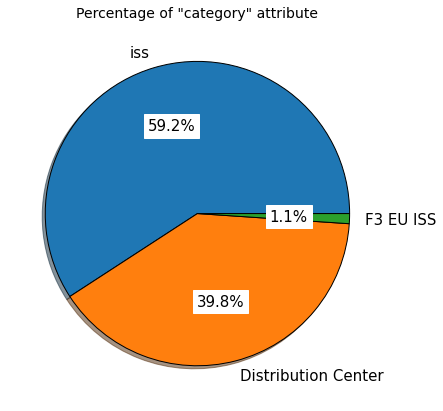

In [ ]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.pie(data['category'].value_counts(), autopct = '%.1f%%', radius = 1, labels = ['iss', 'Distribution Center','F3 EU ISS'],
       explode = [0,0,0], textprops = {'color': 'black', 'size': 15, 'backgroundcolor':'white'}, 
        wedgeprops = {'edgecolor':'black'}, shadow=True)
plt.title('Percentage of "category" attribute', size = 14);

In [ ]:
# From the above plot, we can observe that more than 50% of tickets are resolved under 'iss' category 
# followed by 'Distribution Center' category and 
# just 1% of tickets are resolved under 'F3 EU ISS' category.

'type' attribute

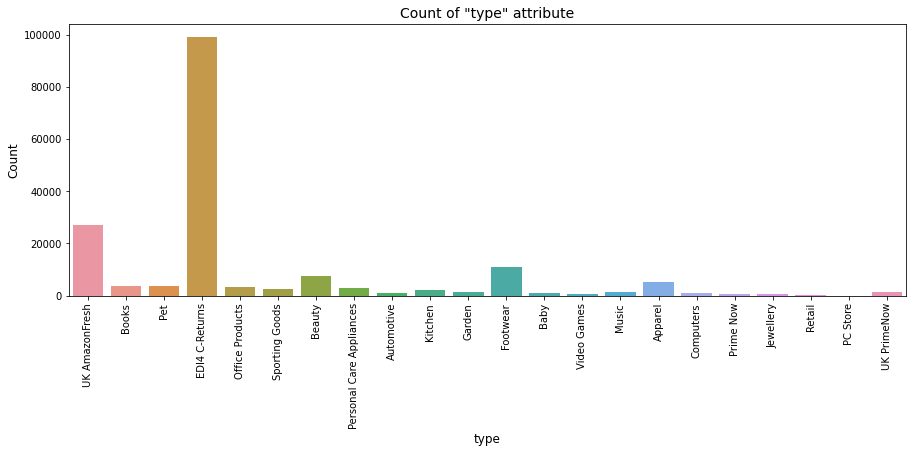

In [ ]:
# plot for type:
plt.figure(figsize=(15,5))
sns.countplot(data['type']);
plt.xlabel('type', size = 12);
plt.ylabel('Count', size = 12);
plt.title('Count of "type" attribute', size = 14);
plt.xticks(rotation = 'vertical');

In [ ]:
# From the above count plot, it can be observed that 
# most of the tickets are assigned for 'EDI4 C-Returns' type of products.

'Item' attribute

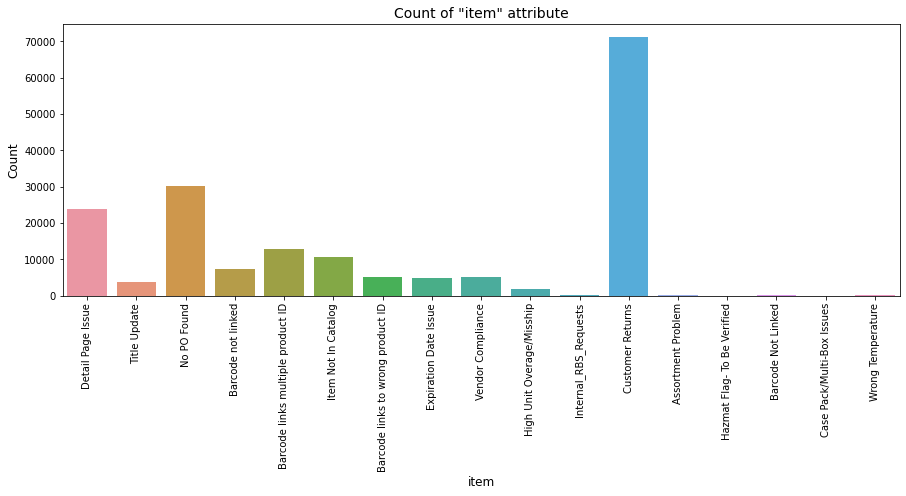

In [ ]:
# plot for item:
plt.figure(figsize=(15,5))
sns.countplot(data['item']);
plt.xlabel('item', size = 12);
plt.ylabel('Count', size = 12);
plt.title('Count of "item" attribute', size = 14);
plt.xticks(rotation = 'vertical');

In [ ]:
# From the above count plot, it can be observed that the 'Customer Returns' issues are maximum 
#   

'assigned_to_group' attribute

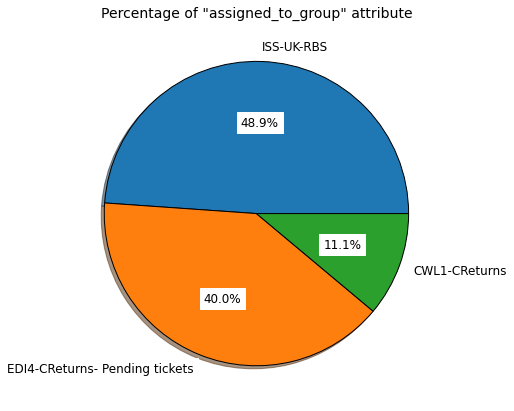

In [ ]:
plt.figure(figsize=(15,7));
plt.subplot(1,2,1)
plt.pie(data['assigned_to_group'].value_counts(), autopct = '%.1f%%', radius = 1, 
        labels = ['ISS-UK-RBS', 'EDI4-CReturns- Pending tickets','CWL1-CReturns'],
       explode = [0,0,0], textprops = {'color': 'black', 'size': 12, 'backgroundcolor':'white'}, 
        wedgeprops = {'edgecolor':'black'}, shadow=True);
plt.title('Percentage of "assigned_to_group" attribute', size = 14);

In [ ]:
# From the above plot, we can observe that 48.9% of tickets are resolved by 'ISS-UK-RBS' team,
# followed by 'EDI4-CReturns- Pending tickets' team and 
# 11.1% of tickets are resolved by 'CWL1-CReturns' team.

'assigned_to_individual' attribute

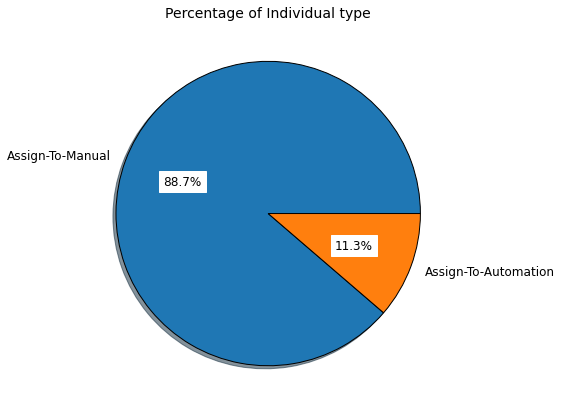

In [ ]:
plt.figure(figsize=(18,7))

plt.subplot(1,2,1)
plt.pie(data['assigned_to_individual'].value_counts(), autopct = '%.1f%%', radius = 1, 
        labels = ['Assign-To-Manual', 'Assign-To-Automation'],
       explode = [0,0], textprops = {'color': 'black', 'size': 12, 'backgroundcolor':'white'}, 
        wedgeprops = {'edgecolor':'black'}, shadow=True);
plt.title('Percentage of Individual type', size=14);

In [ ]:
# From the above plot, we can observe 88.7% of Manual ticket assignments. And the rest is resolved by Automation.

'building_id' attribute

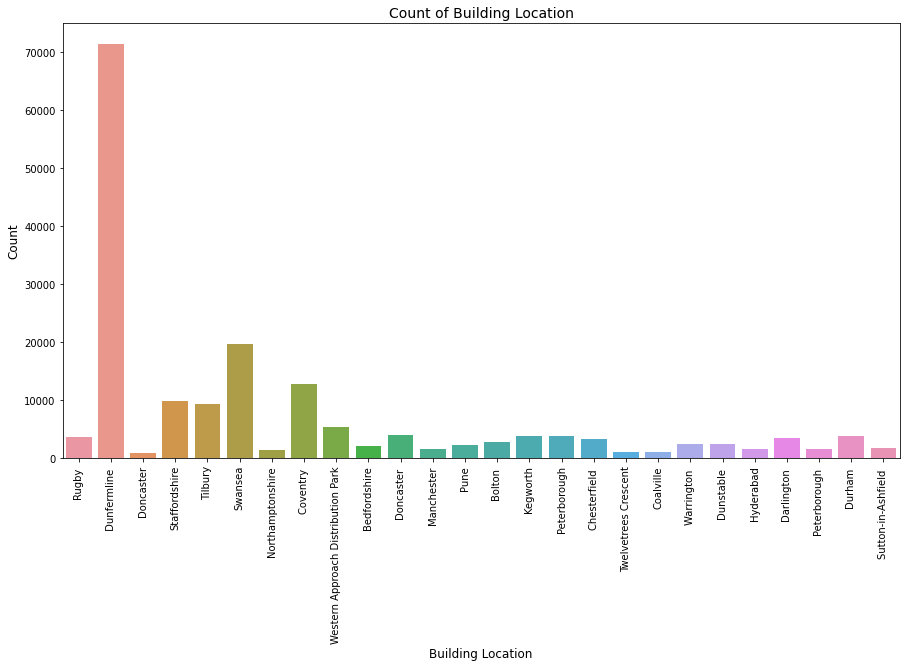

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(x=data['Building Location']);
plt.xlabel('Building Location', size = 12);
plt.ylabel('Count', size = 12);
plt.title('Count of Building Location', size = 14);
plt.xticks(rotation = 'vertical');

In [ ]:
# At Dunfermline location, the building_id 'EDI4' which is the only warehouse present in this location 
# accounts for maximum number of tickets.

'assigned_day' and 'resolved_day' attributes

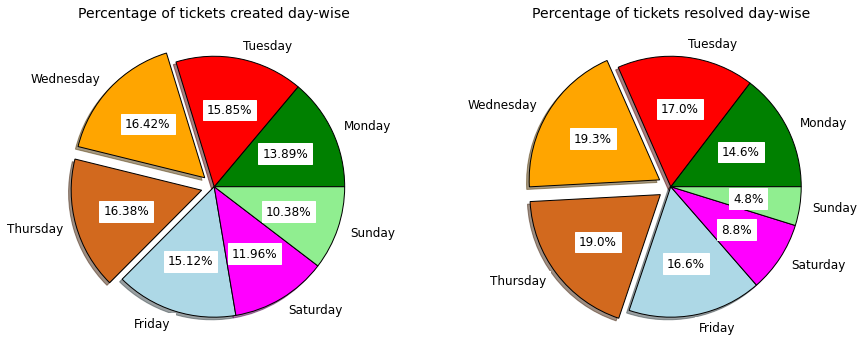

In [ ]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
day = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
value = [27818,31758, 32892,32821, 30292,23968, 20791]

plt.pie(x = value, autopct = '%.2f%%', radius = 1,
        labels =  day, explode = [0,0,0.1,0.1,0,0,0], textprops = {'color': 'black', 'size': 12, 'backgroundcolor':'white'},
        wedgeprops = {'edgecolor':'black'}, shadow=True,
       colors = ['green','red','orange','chocolate','lightblue','magenta','lightgreen']);
plt.title('Percentage of tickets created day-wise', size=14);


plt.subplot(1,2,2)
day = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
value = [29286,34018, 38568,38031, 33206,17608, 9623]

plt.pie(x = value, autopct = '%.1f%%', radius = 1,
        labels =  day, explode = [0,0,0.1,0.1,0,0,0], textprops = {'color': 'black', 'size': 12, 'backgroundcolor':'white'},
        wedgeprops = {'edgecolor':'black'}, shadow=True,
       colors = ['green','red','orange','chocolate','lightblue','magenta','lightgreen']);
plt.title('Percentage of tickets resolved day-wise', size=14);

In [ ]:
# From the above plot we can observe that more number of tickets are created and resolved in the mid of week.
# We can also infer that minimal number of tickets are resolved even on weekends.

'assigned_month' and 'resolved_month' attributes

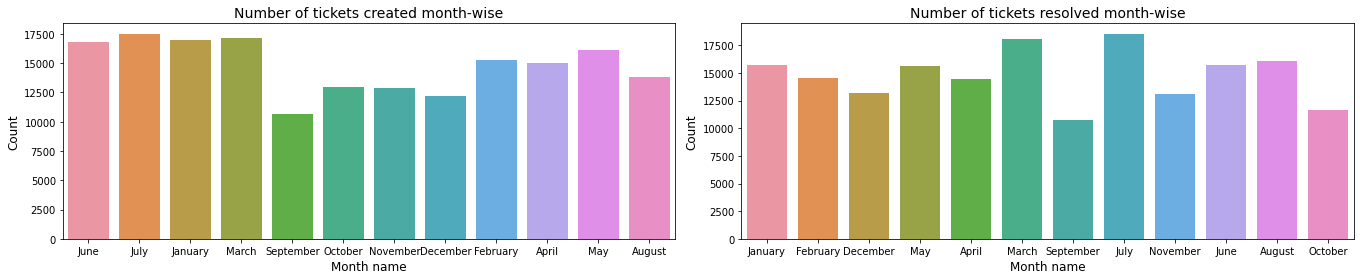

In [ ]:
plt.figure(figsize=(19,4))

plt.subplot(1,2,1)
sns.countplot(data['assigned_month']);
plt.xlabel('Month name', size = 12);
plt.ylabel('Count', size = 12);
plt.title('Number of tickets created month-wise', size = 14);

plt.subplot(1,2,2)
sns.countplot(data['resolved_month']);
plt.xlabel('Month name', size = 12);
plt.ylabel('Count', size = 12);
plt.title('Number of tickets resolved month-wise', size = 14);
plt.tight_layout()

In [ ]:
# From the above count plot, we can observe that more number of tickets are created and resolved in March and the 
# least in September.

In [ ]:
df1['date'].value_counts()

2021-03-23    616
2020-12-17    590
2020-12-22    572
2020-09-06    570
2020-11-25    567
             ... 
2020-01-01     10
2020-12-25      8
2021-08-25      4
2021-08-26      3
2021-08-27      1
Name: date, Length: 605, dtype: int64

Day-wise trend of 'ticket_created' date

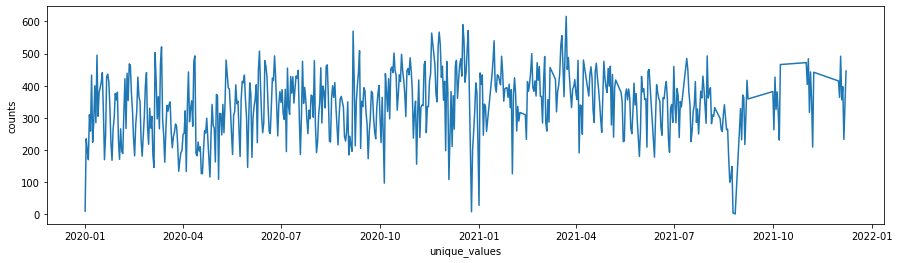

In [ ]:
df5 = df1['date'].value_counts().rename_axis('unique_values').reset_index(name='counts')
df5.sort_values(by='unique_values', ascending=True, inplace = True)
plt.figure(figsize=(15,4))
sns.lineplot(x =df5['unique_values'], y = df5['counts']);

Day-wise trend of 'ticket_resolved' date

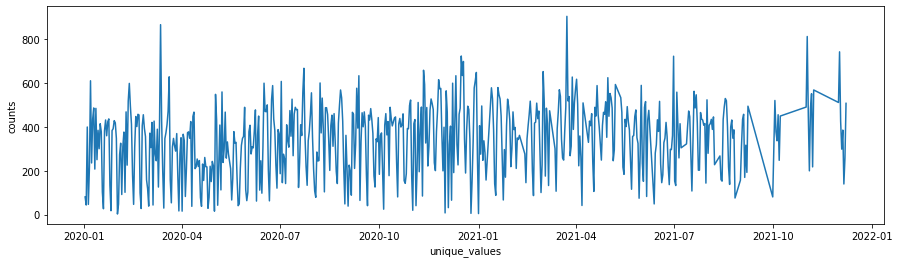

In [ ]:
df6 = df2['date'].value_counts().rename_axis('unique_values').reset_index(name='counts')
df6.sort_values(by='unique_values', ascending=True, inplace = True)
plt.figure(figsize=(15,4))
sns.lineplot(x =df6['unique_values'], y = df6['counts']);

**Analysis of Continuous(Numerical) Variables**

Distribution of numerical variables

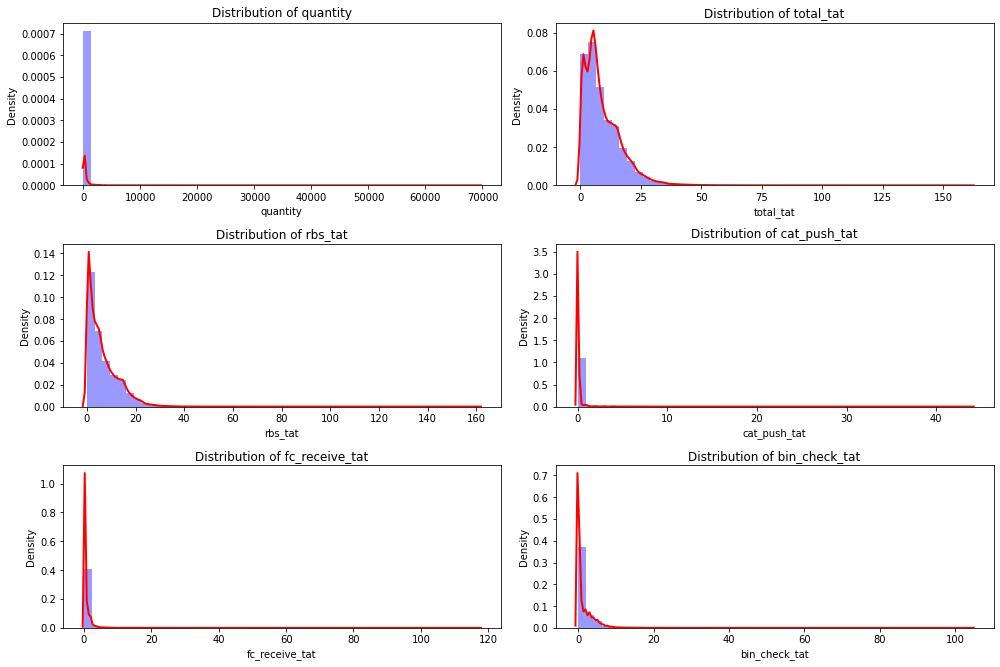

In [ ]:
plt.figure(figsize=(14,12))
j =1
for i in df_num.columns:
    plt.subplot(4,2,j)
    sns.distplot(df_num[i], kde_kws = {'shade':False, 'color':'red', 'linewidth':2}, color = 'blue')
    plt.title(f'Distribution of {i}')
    j +=1
plt.tight_layout()

In [ ]:
# 'quantity','total_tat','rbs_tat','cat_push_tat','fc_receive_tat' and 'bin_check_tat' are positively skewed. 
# 'impact' is negatively skewed.

Skewness in numerical variables

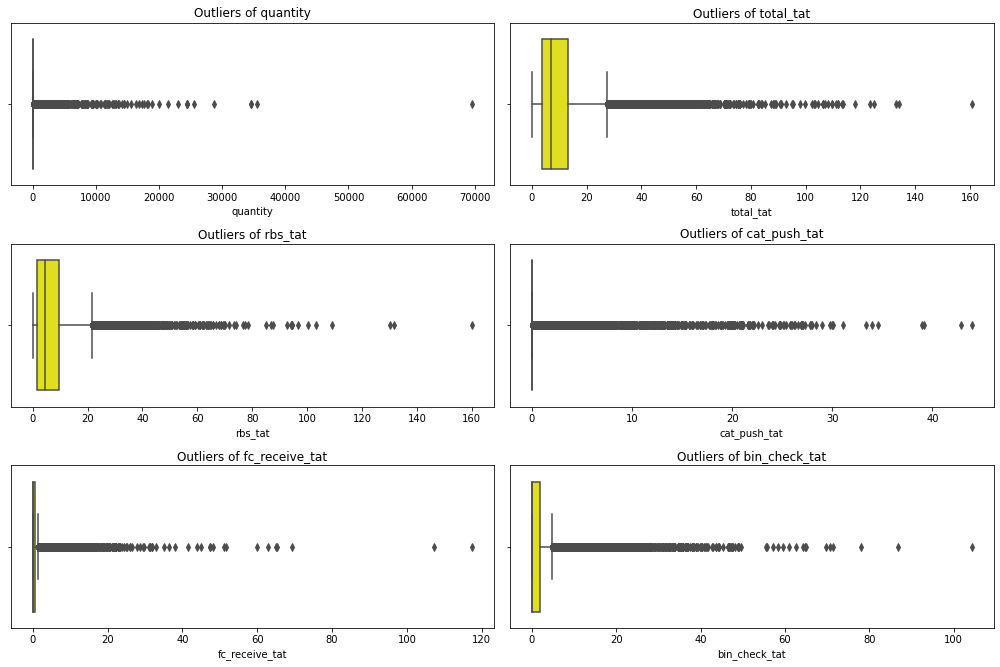

In [ ]:
plt.figure(figsize=(14,12))
j =1
for i in df_num.columns:
    plt.subplot(4,2,j)
    sns.boxplot(df_num[i], color = 'yellow')
    plt.title(f'Outliers of {i}')
    j +=1
plt.tight_layout()

In [ ]:
# Outliers are present in almost all the numerical columns.
# These outliers must be appropriately treated in order to the build reliable models.

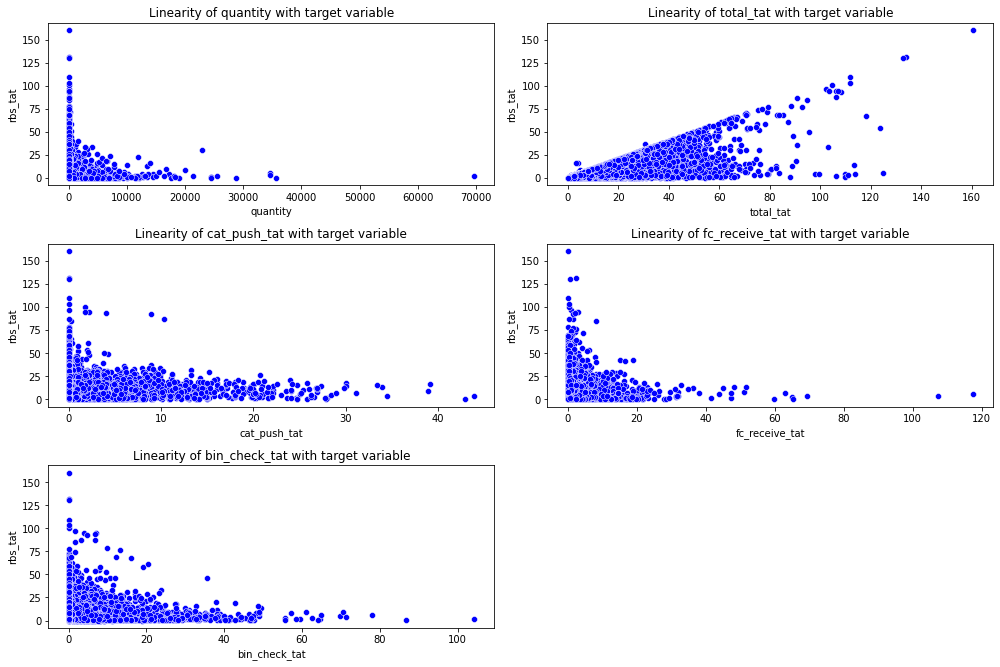

In [ ]:
plt.figure(figsize=(14,12))
j =1
for i in df_num.drop('rbs_tat', axis=1).columns:
    plt.subplot(4,2,j)
    sns.scatterplot(df_num[i], data['rbs_tat'],color = 'blue')
    plt.title(f'Linearity of {i} with target variable')
    j +=1
plt.tight_layout()

**Bivariate Analysis**

Correlation between attributes

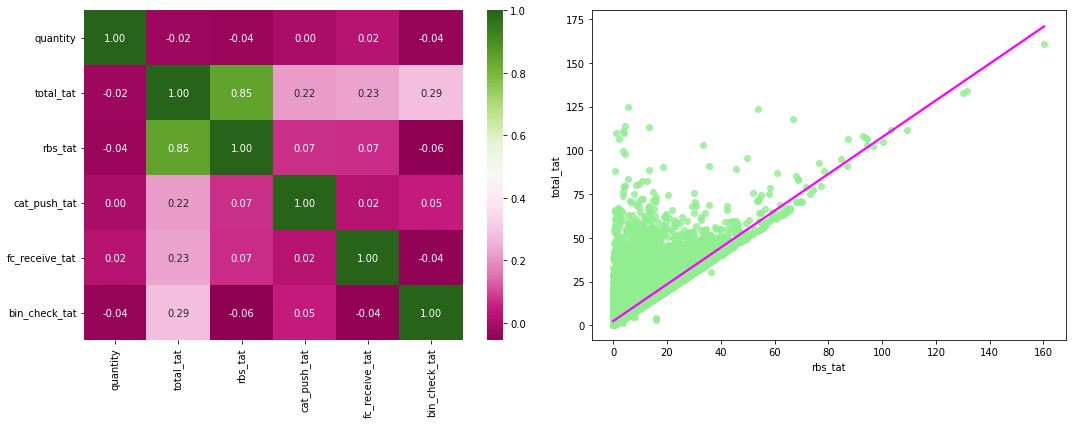

In [ ]:
plt.figure(figsize= (15,6))

plt.subplot(1,2,1)
sns.heatmap(data.corr(), annot = True, fmt = '.2f', cmap = 'PiYG');

plt.subplot(1,2,2)
sns.regplot(data['rbs_tat'], data['total_tat'], line_kws = {'color':'magenta'}, scatter_kws = {'color':'lightgreen'});
plt.tight_layout()

In [ ]:
# From the above heatmap, it can be observed that there is no multicollinearity among the variables.
# However, there is high positive correlation between the dependant variable 'rbs_tat' and the independent variable 'total_tat'.

Analysis of 'category' with 'rbs_tat'

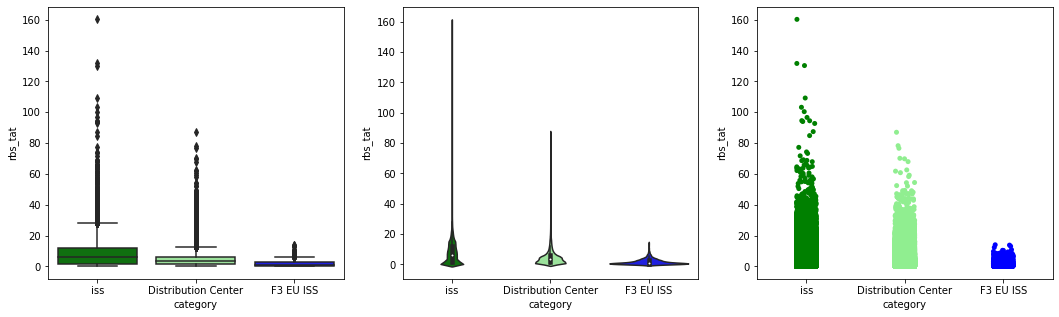

In [ ]:
plt.figure(figsize= (18,5))

plt.subplot(1,3,1)
sns.boxplot(x=data['category'], y=data['rbs_tat'], palette = ['green','lightgreen','blue']);

plt.subplot(1,3,2)
sns.violinplot(x=data['category'], y=data['rbs_tat'], palette = ['green','lightgreen','blue']);

plt.subplot(1,3,3)
sns.stripplot(x=data['category'], y=data['rbs_tat'], palette = ['green','lightgreen','blue']);

In [ ]:
print('**mean**', data.groupby('category')['rbs_tat'].mean()), print('\n**median**',data.groupby('category')['rbs_tat'].median())

**mean** category
Distribution Center    4.658543
F3 EU ISS              1.790812
iss                    7.745751
Name: rbs_tat, dtype: float64

**median** category
Distribution Center    3.54
F3 EU ISS              1.08
iss                    6.42
Name: rbs_tat, dtype: float64


(None, None)

In [ ]:
# From the above boxplot, we can observe that most of the outliers are present under 'iss' category.

# The above violin and strip plots show that the distribution of 'rbs_tat' taken by the 'iss' category
# is more when compared to other categories.

Analysis of 'type' with 'rbs_tat'

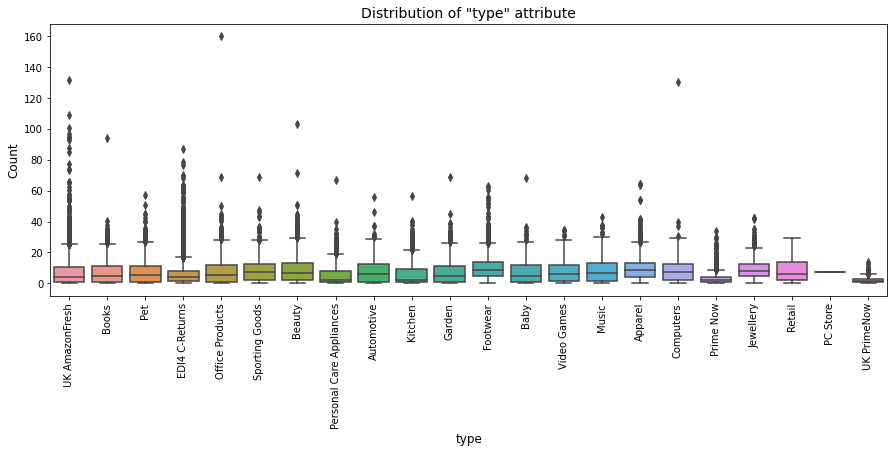

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(data['type'], data['rbs_tat']);
plt.xlabel('type', size = 12);
plt.ylabel('Count', size = 12);
plt.title('Distribution of "type" attribute', size = 14);
plt.xticks(rotation = 'vertical');

In [ ]:
# From the above boxplot, we can observe that most of the outliers are present in 'EDI4 C-Returns' class.
# These outliers must be appropriately treated in order to the build reliable models.

Analysis of 'item' with 'rbs_tat'

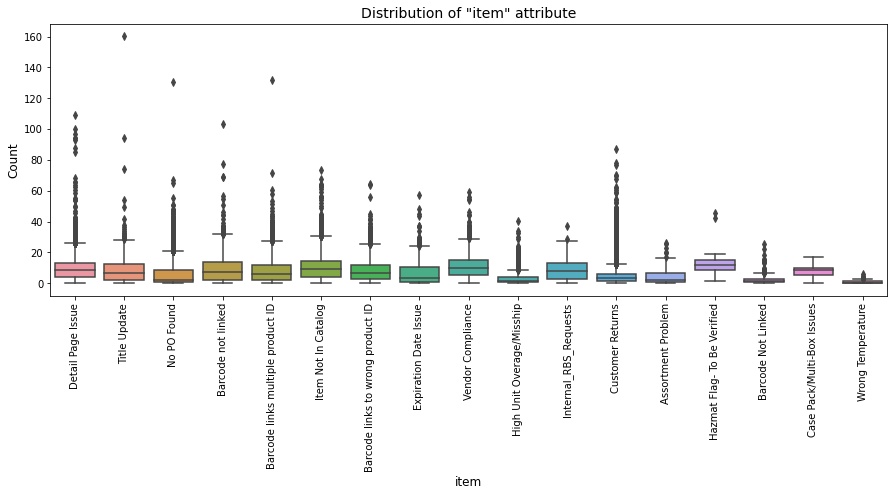

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(data['item'], data['rbs_tat']);
plt.xlabel('item', size = 12);
plt.ylabel('Count', size = 12);
plt.title('Distribution of "item" attribute', size = 14);
plt.xticks(rotation = 'vertical');

In [ ]:
# From the above distribution plot of the 'Item' attribute, 
# we can observe that most of the outliers are present in 'Customer Returns' class.
# The extreme outlier is present in 'Title Update'

Analysis of 'assigned_to_group' with 'rbs_tat'

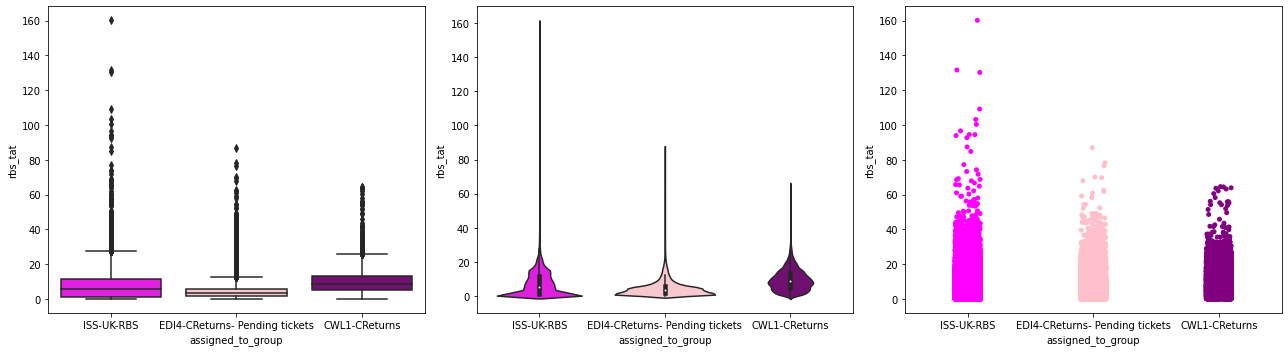

In [ ]:
plt.figure(figsize= (18,5))

plt.subplot(1,3,1)
sns.boxplot(x=data['assigned_to_group'], y=data['rbs_tat'], palette = ['magenta','pink','purple']);

plt.subplot(1,3,2)
sns.violinplot(x=data['assigned_to_group'], y=data['rbs_tat'], palette = ['magenta','pink','purple']);

plt.subplot(1,3,3)
sns.stripplot(x=data['assigned_to_group'], y=data['rbs_tat'], palette = ['magenta','pink','purple']);

plt.tight_layout()

In [ ]:
print('**mean**', data.groupby('assigned_to_group')['rbs_tat'].mean()), print('\n**median**',data.groupby('assigned_to_group')['rbs_tat'].median())

**mean** assigned_to_group
CWL1-CReturns                     9.632157
EDI4-CReturns- Pending tickets    4.661366
ISS-UK-RBS                        7.202754
Name: rbs_tat, dtype: float64

**median** assigned_to_group
CWL1-CReturns                     8.77
EDI4-CReturns- Pending tickets    3.54
ISS-UK-RBS                        5.46
Name: rbs_tat, dtype: float64


(None, None)

In [ ]:
# From the above boxplot, we can observe that most of the outliers are present in 'ISS-UK-RBS' class.
# The above violin and strip plots show that the distribution of 'rbs_tat' taken by the 'ISS-UK-RBS' team  
# is more when compared to other teams.

Analysis of 'assigned_to_individual' with 'rbs_tat'

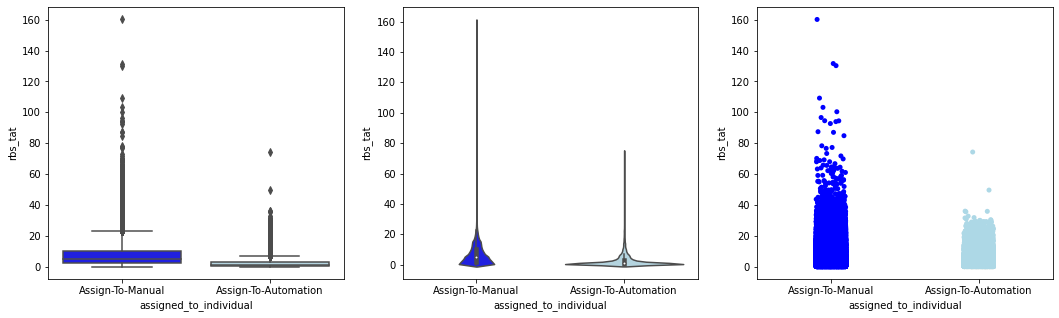

In [ ]:
plt.figure(figsize= (18,5))

plt.subplot(1,3,1)
sns.boxplot(x=data['assigned_to_individual'], y=data['rbs_tat'], palette = ['blue','lightblue']);

plt.subplot(1,3,2)
sns.violinplot(x=data['assigned_to_individual'], y=data['rbs_tat'], palette = ['blue','lightblue']);

plt.subplot(1,3,3)
sns.stripplot(x=data['assigned_to_individual'], y=data['rbs_tat'], palette = ['blue','lightblue']);

In [ ]:
print('**mean**', data.groupby('assigned_to_individual')['rbs_tat'].mean()), print('\n**median**',data.groupby('assigned_to_individual')['rbs_tat'].median())

**mean** assigned_to_individual
Assign-To-Automation    2.618459
Assign-To-Manual        6.943920
Name: rbs_tat, dtype: float64

**median** assigned_to_individual
Assign-To-Automation    1.04
Assign-To-Manual        5.12
Name: rbs_tat, dtype: float64


(None, None)

In [ ]:
# From the above boxplot, we can observe that most of the outliers are present in 'Assign-To-Manual' class.
# The above violin and strip plots show that the observations are found more under Manual ticket assignments.

Analysis of item with assigned_to_individual

assigned_to_individual,Assign-To-Automation,Assign-To-Manual,All
item,,,
Assortment Problem,146,102,248
Barcode Not Linked,0,322,322
Barcode links multiple product ID,589,12175,12764
Barcode links to wrong product ID,466,4764,5230
Barcode not linked,593,6734,7327
Case Pack/Multi-Box Issues,1,24,25
Customer Returns,1625,69631,71256
Detail Page Issue,661,23096,23757
Expiration Date Issue,1473,3460,4933


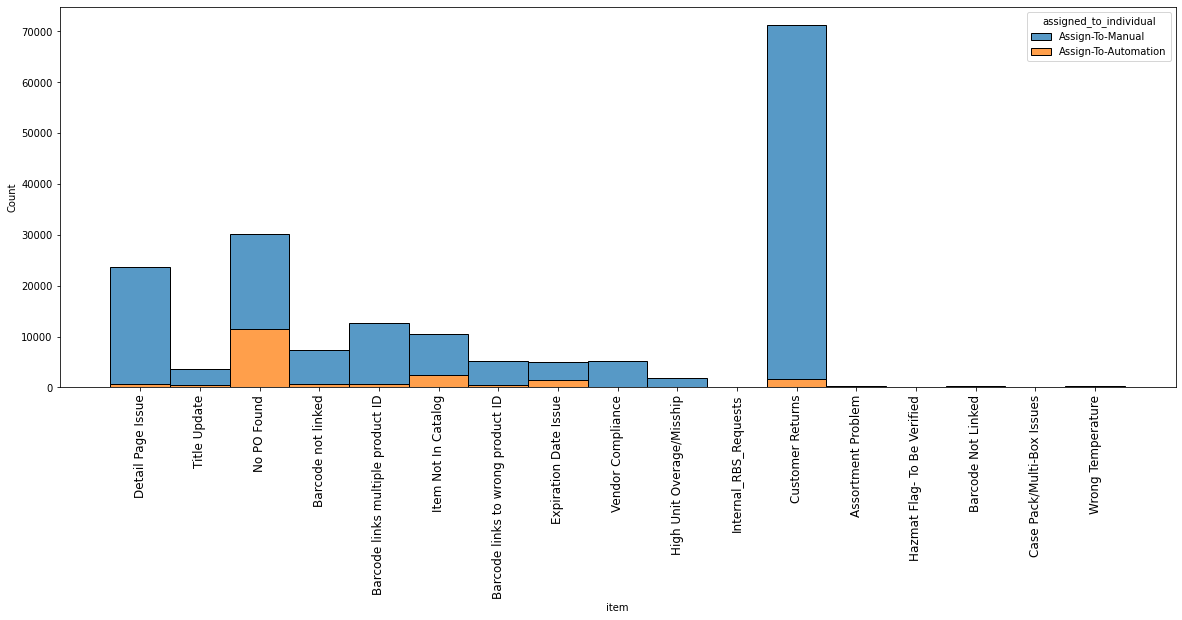

In [ ]:
plt.figure(figsize=(20,7))
sns.histplot(binwidth=0.5, x="item", hue="assigned_to_individual", data=data, stat="count", multiple="stack");
plt.xticks(rotation='vertical', size=12);
pd.crosstab(data['assigned_to_individual'],data['item'], margins = True).T

In [ ]:
# Using Automation 20,068 tickets are being resolved. The top 'item' contributer is 'No PO found'.
# Using Manual methods, 1,58,385 tickets are being resolved. The top 'item' contributer is 'Customer Returns'.

Analysis of building location with respect to item

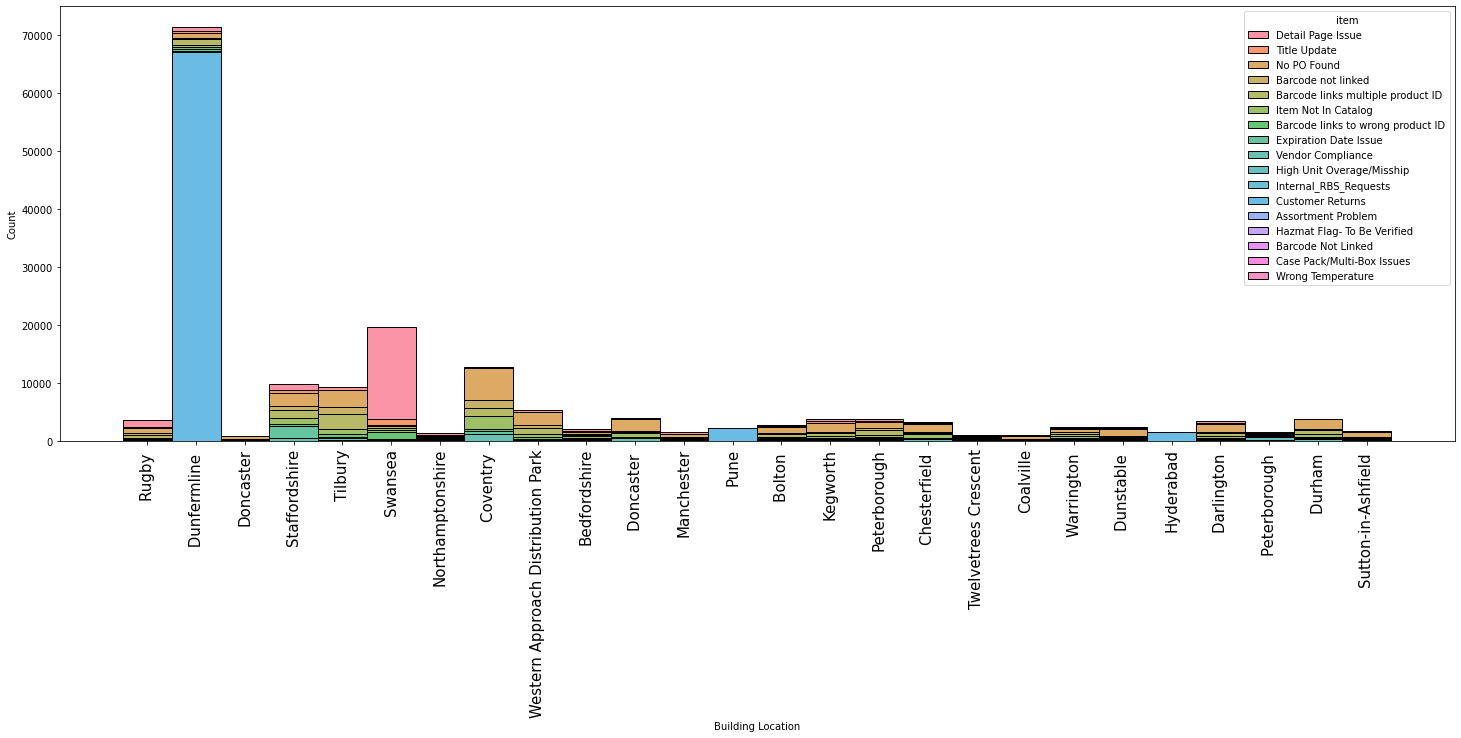

In [ ]:
plt.figure(figsize=(25,8))
sns.histplot(x='Building Location', hue='item', data=data, stat="count", multiple="stack");
plt.xticks(rotation = 'vertical',size = 15);

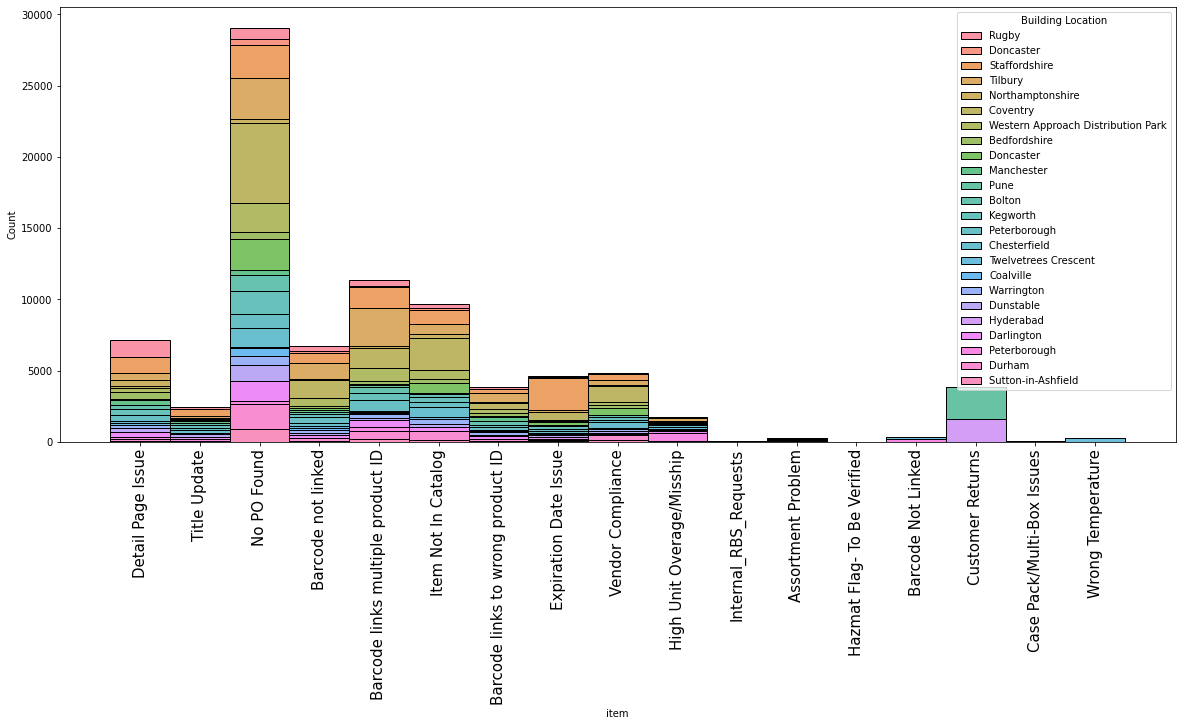

In [ ]:
plt.figure(figsize=(20,8))
customer_returns1=data[(data['building_id']!='EDI4')&(data['building_id']!='CWL1')]
sns.histplot(x='item', hue='Building Location', data=customer_returns1, stat="count", multiple="stack");
plt.xticks(rotation = 'vertical',size = 15);

In [ ]:
# 'No PO Found' is occuring more in Coventry building location. 
# A lot of 'Expiration Date Issue' is found in Stafffordshire. This implies that in this particular warehouse will inbound more of grocery products.

In [ ]:
data.groupby('item')['Building Location'].value_counts().sort_values(ascending = False)

item                               Building Location
Customer Returns                    Dunfermline         67154
Detail Page Issue                  Swansea              15830
No PO Found                        Coventry              5621
                                   Tilbury               2939
Barcode links multiple product ID  Tilbury               2697
                                                        ...  
Customer Returns                   Warrington               1
                                   Staffordshire            1
Barcode Not Linked                 Warrington               1
                                   Tilbury                  1
Wrong Temperature                  Peterborough             1
Name: Building Location, Length: 324, dtype: int64

In [ ]:
# From the above plot, we can observe that Dunfermline Building Location has more of 'Customer Return' issues.

Analysis of building_location with respect to root cause

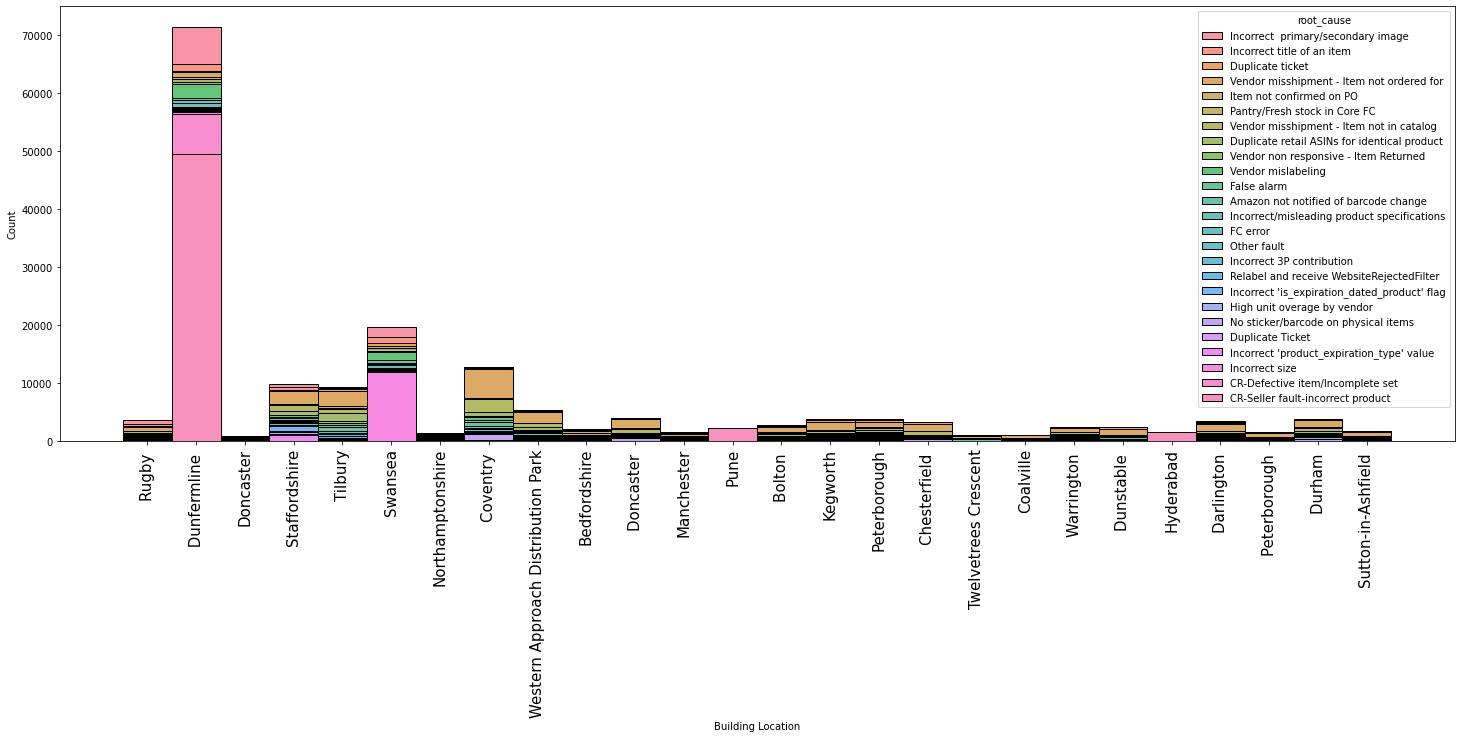

In [ ]:
plt.figure(figsize=(25,8))
sns.histplot(x='Building Location', hue='root_cause', data=data, stat="count", multiple="stack");
plt.xticks(rotation = 'vertical',size = 15);

In [ ]:
# From the above plot, we can observe that Dunfermline Building Location is facing more of 'Customer Return' issues
# because of 'CR-Seller fault-incorrect product'.
# This root cause is mainly because  of the third party sellers. 
# Thus, it can be inferred that 'Customer Return' issues have occured because of these sellers 
# that has in return affected the customer experience.

In [ ]:
data.groupby('root_cause')['Building Location'].value_counts().sort_values(ascending = False)

root_cause                                 Building Location   
CR-Seller fault-incorrect product           Dunfermline            49517
Incorrect size                             Swansea                 11921
CR-Defective item/Incomplete set            Dunfermline             6994
Incorrect  primary/secondary image          Dunfermline             6340
Vendor misshipment - Item not ordered for  Coventry                 4900
                                                                   ...  
Pantry/Fresh stock in Core FC              Doncaster                   1
                                           Coalville                   1
No sticker/barcode on physical items       Peterborough                1
                                           Twelvetrees Crescent        1
Vendor non responsive - Item Returned      Twelvetrees Crescent        1
Name: Building Location, Length: 551, dtype: int64

Analysis of category with assigned_to_group

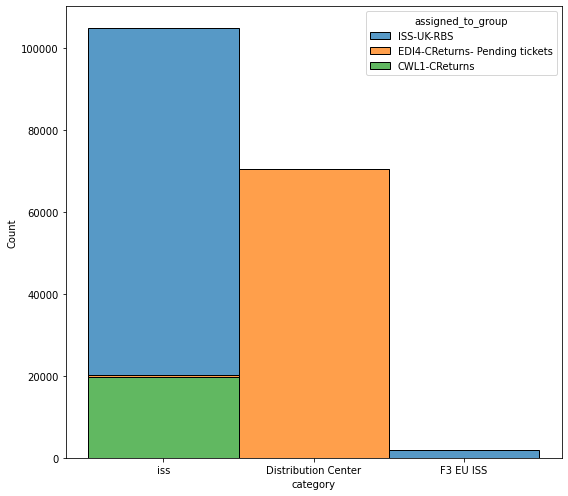

In [ ]:
plt.figure(figsize=(8,7))
sns.histplot(binwidth=0.5, x="category", hue="assigned_to_group", data=data, stat="count", multiple="stack");
plt.tight_layout()

In [ ]:
data.groupby('assigned_to_group')['category'].value_counts()

assigned_to_group               category           
CWL1-CReturns                   iss                    19672
EDI4-CReturns- Pending tickets  Distribution Center    70515
                                iss                      495
ISS-UK-RBS                      iss                    84820
                                F3 EU ISS               1885
                                Distribution Center       29
Name: category, dtype: int64

In [ ]:
# 'CWL1-CReturns','EDI4-CReturns- Pending tickets',ISS-UK-RBS' are the names of the teams which are assigned under 'iss' category.
# 'ISS-UK-RBS' team is assigned with more tickets under 'iss' category.

# 'EDI4-CReturns- Pending tickets' is the name of the team under 'Distribution Center' category. 

# 'ISS-UK-RBS' team is also assigned under 'F3 EU ISS' category.

Analysis of assigned_day with respect to category

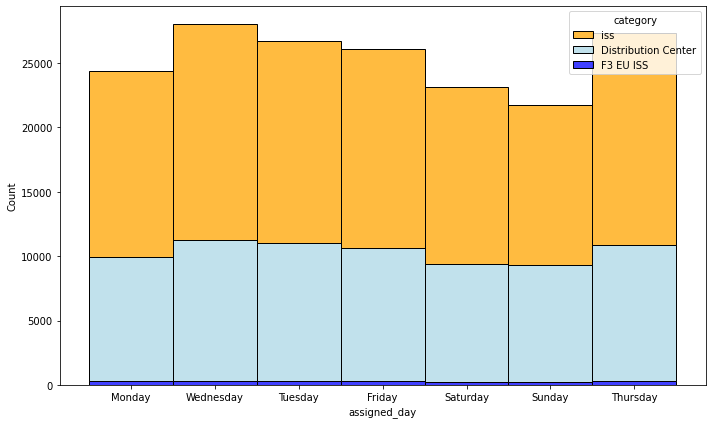

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(binwidth=0.5, x="assigned_day", hue="category", data=data, stat="count", multiple="stack", 
             palette = ['orange', 'lightblue', 'blue']);
plt.tight_layout()

In [ ]:
# From the above plot, we can observe that more tickets are assigned during mid weeks.
# During mid weeks (i.e. thursday and wednesday), more stocks are being sent out by the vendors 
# resulting in the increased tickets.
# Also, major number of the tickets are assigned to 'iss' category on all the days.

In [ ]:
data.groupby('category')['assigned_day'].value_counts()

category             assigned_day
Distribution Center  Wednesday       10970
                     Tuesday         10723
                     Thursday        10600
                     Friday          10328
                     Monday           9688
                     Saturday         9157
                     Sunday           9078
F3 EU ISS            Friday            330
                     Monday            281
                     Tuesday           278
                     Thursday          277
                     Wednesday         265
                     Sunday            242
                     Saturday          212
iss                  Wednesday       16764
                     Thursday        16476
                     Tuesday         15696
                     Friday          15469
                     Monday          14395
                     Saturday        13736
                     Sunday          12451
Name: assigned_day, dtype: int64

In [ ]:
data.groupby('assigned_day')['category'].value_counts()

assigned_day  category           
Friday        iss                    15469
              Distribution Center    10328
              F3 EU ISS                330
Monday        iss                    14395
              Distribution Center     9688
              F3 EU ISS                281
Saturday      iss                    13736
              Distribution Center     9157
              F3 EU ISS                212
Sunday        iss                    12451
              Distribution Center     9078
              F3 EU ISS                242
Thursday      iss                    16476
              Distribution Center    10600
              F3 EU ISS                277
Tuesday       iss                    15696
              Distribution Center    10723
              F3 EU ISS                278
Wednesday     iss                    16764
              Distribution Center    10970
              F3 EU ISS                265
Name: category, dtype: int64

Analysis of 'category' with respect to 'total_tat' and 'rbs_tat'

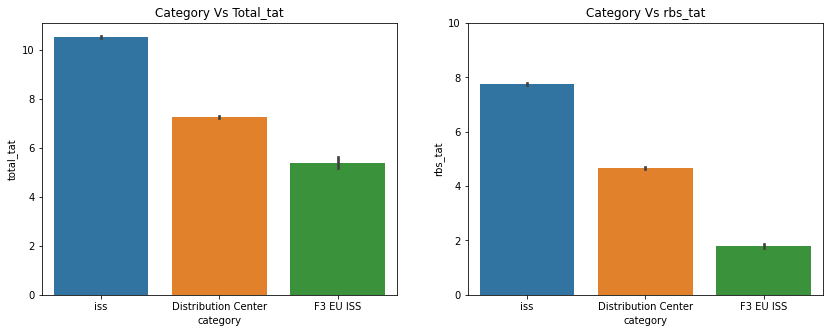

In [ ]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
sns.barplot(data['category'],data['total_tat']);
plt.title('Category Vs Total_tat');

plt.subplot(1,2,2)
sns.barplot(data['category'],data['rbs_tat']);
plt.ylim((0,10));
plt.title('Category Vs rbs_tat');

In [ ]:
# From the above 2 plots we can say that, the team under 'F3 EU ISS' category works in a faster manner when they deal with the perishable items.
# In the left plot, 'F3 EU ISS' deals only with perishable products hence total tat is low and has high priority.

'category' with respect to 'bin_check_tat'

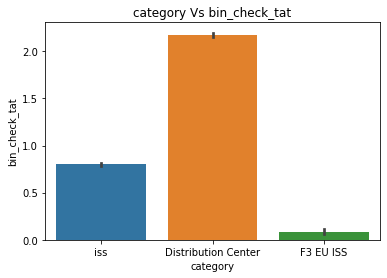

In [ ]:
sns.barplot(data['category'],data['bin_check_tat']);
plt.title('category Vs bin_check_tat');

In [ ]:
# Stock checks raised on 'F3 EU ISS' tickets are much faster when compared with other categories.
# So these warehouses to which binchecks are raised have low 'bin_check_tat'.

Building_id Vs rbs_tat

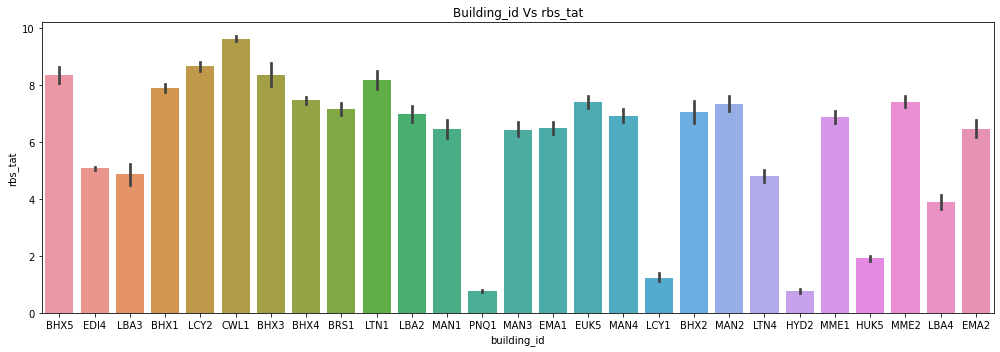

In [ ]:
plt.figure(figsize=(14,5))

sns.barplot(data['building_id'],data['rbs_tat'])
plt.title('Building_id Vs rbs_tat')
plt.tight_layout()

Analysis of 'type' in 'CWL1' warehouse:

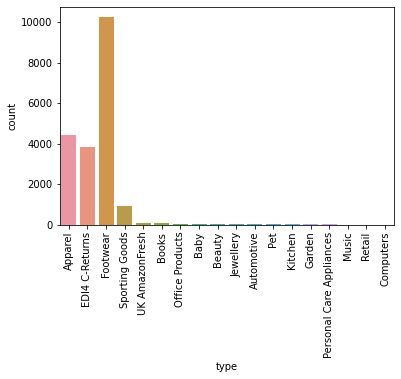

In [ ]:
cwl1=data[data['building_id']=='CWL1']
sns.countplot(cwl1['type']);
plt.xticks(rotation = 'vertical');

In [ ]:
# CWL1 has very high rbs_tat when compared to rest of the warehouses. 
# From this we can infer that, the team takes more time in resolving customer returns of apparel and footwear.

In [ ]:
# 

'Assigned_to_group' analysis with 'total_tat', 'rbs_tat' and 'bin_check_tat'

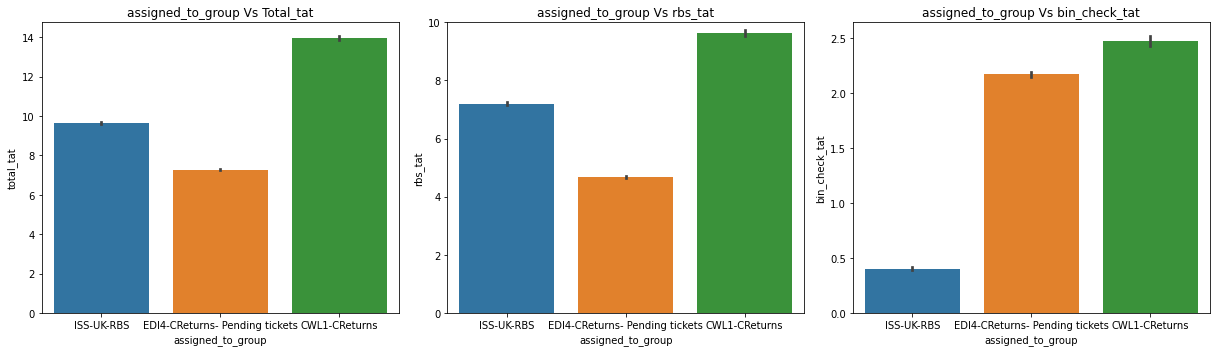

In [ ]:
plt.figure(figsize=(17,5))

plt.subplot(1,3,1)
sns.barplot(data['assigned_to_group'],data['total_tat']);
plt.title('assigned_to_group Vs Total_tat');

plt.subplot(1,3,2)
sns.barplot(data['assigned_to_group'],data['rbs_tat']);
plt.ylim((0,10));
plt.title('assigned_to_group Vs rbs_tat');

plt.subplot(1,3,3)
sns.barplot(data['assigned_to_group'],data['bin_check_tat']);
plt.title('assigned_to_group Vs bin_check_tat');
plt.tight_layout()

In [ ]:
# From the above 3 plots we can infer that 'CWL1 CReturns', high 'bin_check' have high 'total_tat' and 'rbs_tat' due to 'bin_check_tat' as it will affect 

Relationship between all the variables

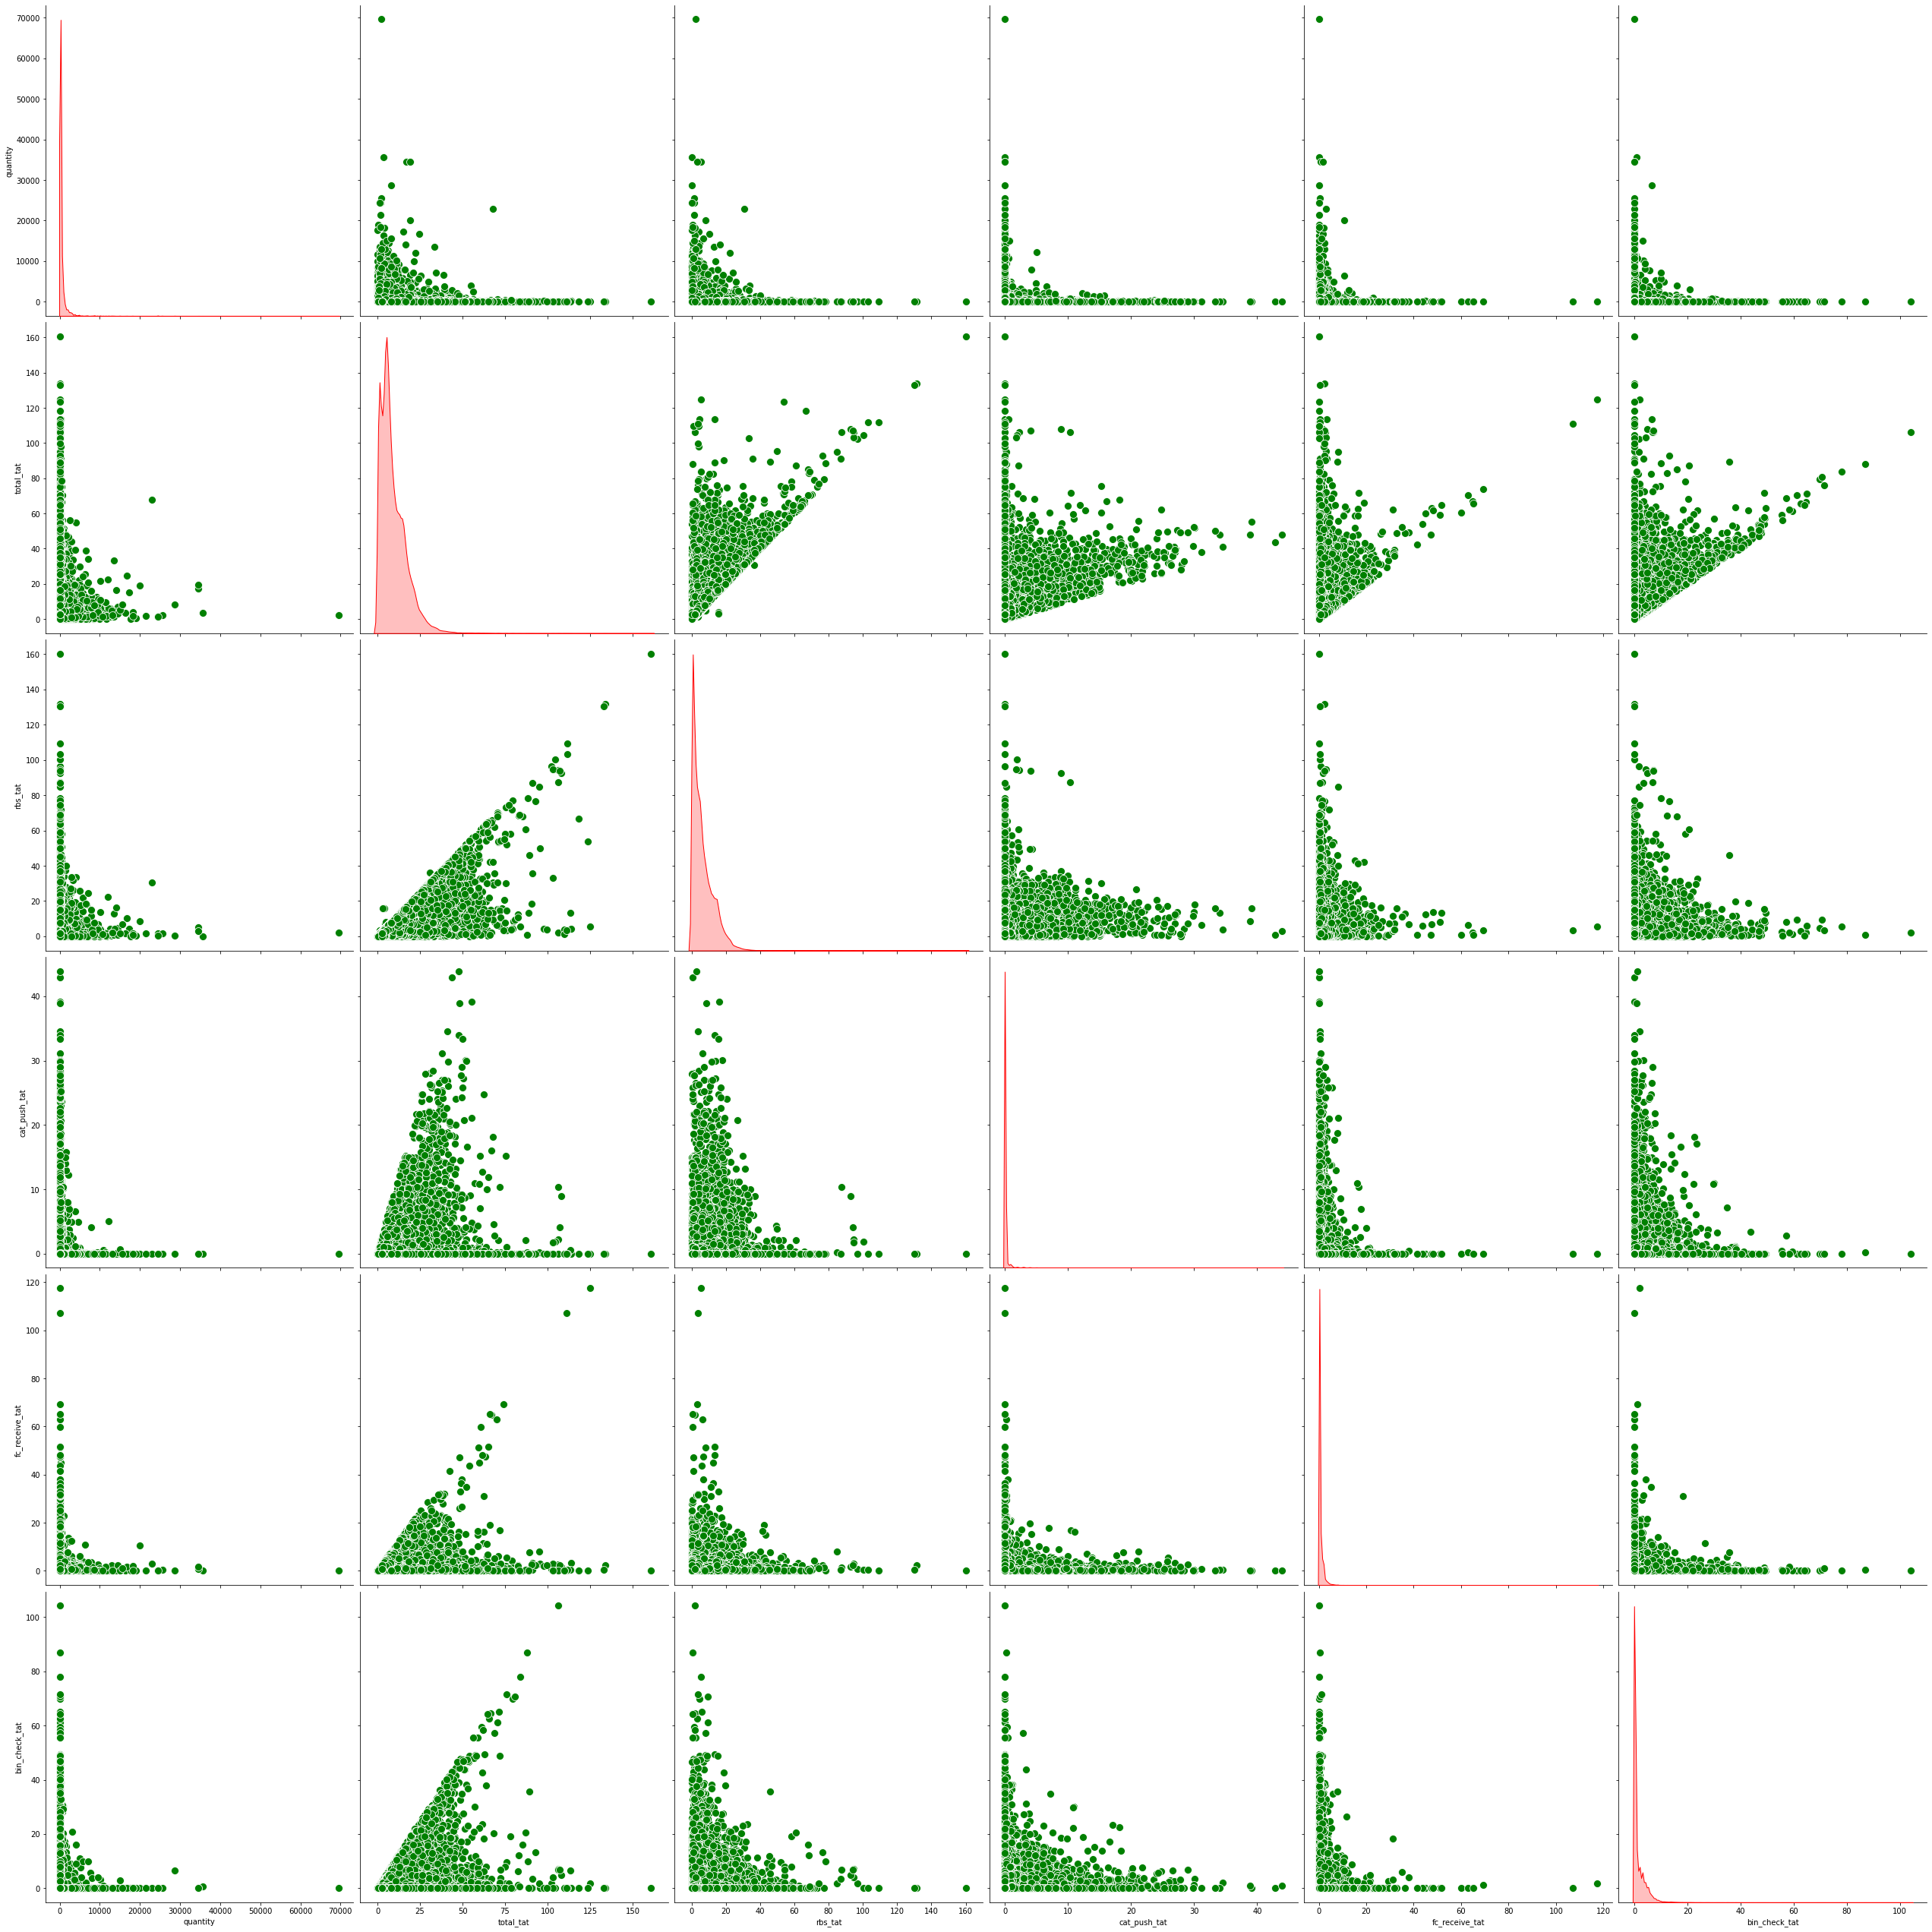

In [ ]:
sns.pairplot(df_num, diag_kind = 'kde',
             plot_kws = {'s': 100, 'color':'green'},
             diag_kws = {'color':'red'},
             size = 6)
plt.show()

In [ ]:
# The above pair plot shows the pairwise relationship between all the numerical variables.
# 'total_tat' and 'rbs_tat' have a positive linear relationship with each other.  

**Statistical Tests**

**Chisquare test for checking dependency of feature and target**

In [ ]:
from scipy import stats
from prettytable import PrettyTable

**Checking the normality of numerical variables**

In [ ]:
t = PrettyTable(['Column Name', 'P Values', 'Interpretation'])
for col in data[['rbs_tat','quantity']]:
    stat, p = stats.jarque_bera(data[col])
    if p<0.05:
        cm = 'Not normally distributed'
    else:
        cm = 'Normally distributed'
    t.add_row([col,p,cm ])
print(t)

+-------------+----------+--------------------------+
| Column Name | P Values |      Interpretation      |
+-------------+----------+--------------------------+
|   rbs_tat   |   0.0    | Not normally distributed |
|   quantity  |   0.0    | Not normally distributed |
+-------------+----------+--------------------------+


**Checking dependency between numerical and target variable**

In [ ]:
from scipy.stats import spearmanr
cor, p = spearmanr(data['quantity'], data['rbs_tat'])
cor

0.0016962834507357695

In [ ]:
# Correlation is equal to zero. So they are not correlated.

**Model Building**

In [ ]:
from sklearn.model_selection import train_test_split
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import rmse
from scipy import stats
from scipy.stats import shapiro
from scipy.stats import jarque_bera
from statsmodels.stats.stattools import durbin_watson
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

**Encoding of categorical variables**

In [ ]:
data.columns

Index(['case_id', 'impact', 'category', 'type', 'item', 'assigned_to_group',
       'assigned_to_individual', 'status', 'ticket_create_date',
       'ticket_resolved_date', 'building_id', 'quantity', 'root_cause',
       'total_tat', 'rbs_tat', 'cat_push_tat', 'fc_receive_tat',
       'bin_check_tat', 'assigned_day', 'assigned_month', 'resolved_day',
       'resolved_month', 'Building Location'],
      dtype='object')

In [ ]:
data.shape

(177416, 23)

In [ ]:
data['assigned_to_group'].value_counts(normalize=True)

ISS-UK-RBS                        0.488874
EDI4-CReturns- Pending tickets    0.400246
CWL1-CReturns                     0.110881
Name: assigned_to_group, dtype: float64

In [ ]:
data['assigned_to_individual'].value_counts()

Assign-To-Manual        157360
Assign-To-Automation     20056
Name: assigned_to_individual, dtype: int64

In [ ]:
data.shape

(177416, 23)

In [ ]:
df = data.drop(data[data['assigned_to_individual'] == 'Assign-To-Automation'].index, axis=0)

In [ ]:
# At the stage of deployment, tickets that will be resolved automatically will not be predicted by the model. Hence, 'Assign-To-Automation'
# can be dropped.

In [ ]:
df.shape

(157360, 23)

In [ ]:
feature = df[['category','type','item','assigned_to_group','Building Location','impact','quantity']]
target = df['rbs_tat']

num = feature.select_dtypes(np.number)
cat = feature.select_dtypes(object)

num.reset_index(drop=True, inplace=True)

encode = pd.get_dummies(cat,drop_first=True)
encode.reset_index(drop=True, inplace=True)

X = pd.concat([num,encode],axis=1)
y = target.reset_index(drop=True)

In [ ]:
# For the model building, 'category','type','item','assigned_to_group','Building Location','impact','quantity' columns are only considered for
# train and test data. Columns having different types of tat are generated by finding the difference between ticket creation and resolved date.
# So these columns will not be available as independant variables during deployment.
# Hence such columns are not given to the model for prediction. 

# Target is 'rbs_tat'. With the independent variables the time taken to resolve a ticket is predicted. So while deployement, the model will predict
# the optimal number of days to resolve a ticket by which the ticket can be allocated to an associate well in advance in order to meet 
# 12 days SLA.

In [ ]:
X.head()

,quantity,category_F3 EU ISS,category_iss,type_Automotive,type_Baby,type_Beauty,type_Books,type_Computers,type_EDI4 C-Returns,type_Footwear,type_Garden,type_Jewellery,type_Kitchen,type_Music,type_Office Products,type_PC Store,type_Personal Care Appliances,type_Pet,type_Prime Now,type_Retail,type_Sporting Goods,type_UK AmazonFresh,type_UK PrimeNow,type_Video Games,item_Barcode Not Linked,item_Barcode links multiple product ID,item_Barcode links to wrong product ID,item_Barcode not linked,item_Case Pack/Multi-Box Issues,item_Customer Returns,item_Detail Page Issue,item_Expiration Date Issue,item_Hazmat Flag- To Be Verified,item_High Unit Overage/Misship,item_Internal_RBS_Requests,item_Item Not In Catalog,item_No PO Found,item_Title Update,item_Vendor Compliance,item_Wrong Temperature,assigned_to_group_EDI4-CReturns- Pending tickets,assigned_to_group_ISS-UK-RBS,Building Location_Bedfordshire,Building Location_Bolton,Building Location_Chesterfield,Building Location_Coalville,Building Location_Coventry,Building Location_Darlington,Building Location_Doncaster,Building Location_Doncaster,Building Location_Dunstable,Building Location_Durham,Building Location_Hyderabad,Building Location_Kegworth,Building Location_Manchester,Building Location_Northamptonshire,Building Location_Peterborough,Building Location_Peterborough,Building Location_Pune,Building Location_Rugby,Building Location_Staffordshire,Building Location_Sutton-in-Ashfield,Building Location_Swansea,Building Location_Tilbury,Building Location_Twelvetrees Crescent,Building Location_Warrington,Building Location_Western Approach Distribution Park,impact_3,impact_4,impact_5
0,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,40.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,4.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,12.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,38.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [ ]:
print('Number of Numerical columns:',len(num.columns))
print('Number of Categorical columns:',len(cat.columns))

Number of Numerical columns: 1
Number of Categorical columns: 6


In [ ]:
X.shape

(157360, 70)

**Assumptions Before MLR Model**

**Assumption on Dependent Variable**

In [ ]:
y.dtype

dtype('float64')

In [ ]:
# Target variable is numerical.

**Normality of target variable**

In [ ]:
stat, p = jarque_bera(target)
print('Statistics=%.3f, p-value=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('The data is normally distributed (fail to reject H0)')
else:
    print('The data is not normally distributed (reject H0)')

Statistics=834596.203, p-value=0.000
The data is not normally distributed (reject H0)


In [ ]:
# It is apparent that the p-value is less than 0.05. So we have enough evidence to reject the null hypothesis. 
# It can be concluded that the data is not normally distributed. So, we can do log transformation on the target variable.
# But first, the base model is built without log transformation.

**Train and Test data**

In [ ]:
X = sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

print("The shape of X_train is:",X_train.shape)
print("The shape of X_test is:",X_test.shape)
print("The shape of y_train is:",y_train.shape)
print("The shape of y_test is:",y_test.shape)

The shape of X_train is: (118020, 71)
The shape of X_test is: (39340, 71)
The shape of y_train is: (118020,)
The shape of y_test is: (39340,)


**Linear Regression (OLS)**- full model without Log transformation 

In [ ]:
linreg_full_model = sm.OLS(y_train, X_train, random_state = 10).fit()
print(linreg_full_model.summary())

                            OLS Regression Results                            
Dep. Variable:                rbs_tat   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     483.6
Date:                Thu, 21 Oct 2021   Prob (F-statistic):               0.00
Time:                        14:41:32   Log-Likelihood:            -3.7140e+05
No. Observations:              118020   AIC:                         7.429e+05
Df Residuals:                  117951   BIC:                         7.436e+05
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [ ]:
linreg_full_model.rsquared

0.21802805821835225

In [ ]:
linreg_full_model.rsquared_adj

0.21757724311681736

In [ ]:
# The R-squared and Adj.R-squared value obtained from this model is 86.3 which means that the above model explains 86.3% of the variation in the rbs_tat.

**Assumptions After MLR Model**

**Independence of observations should exist (Absence of Autocorrelation)**

In [ ]:
# Durbin Watson test
# H0: There is no autocorrelation in the residuals
# H1: There is autocorrelation in the residuals
# The summary output shows that the value of the test statistic is close to 2 (= 2.004) which means there is no autocorrelation.

**Predictors must not show multicollinearity**

In [ ]:
# Multicollinearity test
# The 'Cond. No' (= 1.41e+16) represents the Condition Number (CN) which is used to check the multicollinearity. 
# Thus, it can be seen that there is severe multicollinearity in the data.

**Variance Inflation Factor (VIF)**

In [ ]:
num.shape[1]

1

In [ ]:
# vif = pd.DataFrame()
# vif['VIF_Factor'] = [variance_inflation_factor(num.values,i) for i in range(num.shape[1])]
# vif['Features'] = num.columns
# vif.sort_values('VIF_Factor',ascending = False).reset_index(drop = True)

**Linear relationship between dependent and independent variables**

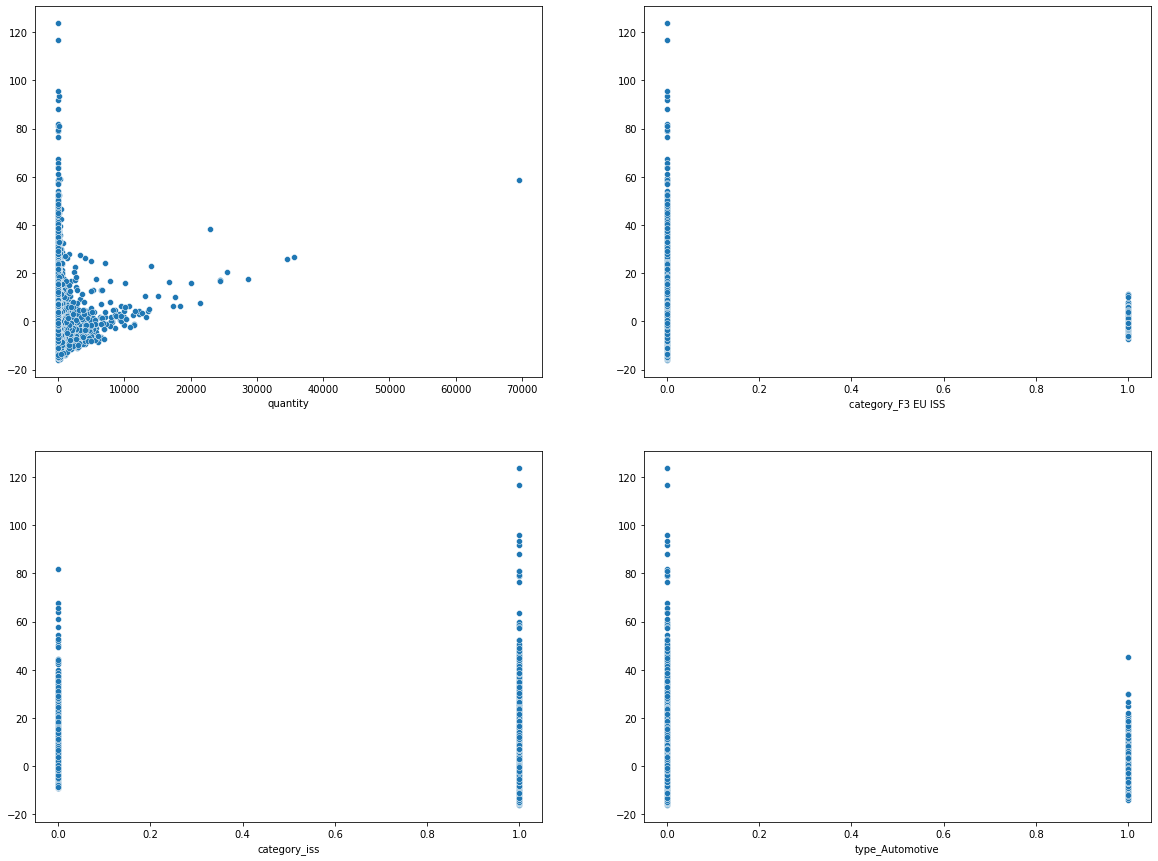

In [ ]:
fig,ax = plt.subplots(nrows = 2,ncols = 2,figsize = (20,15))
for variable,subplot in zip(X_train.columns[1:5],ax.flatten()):
    sns.scatterplot(X_train[variable],linreg_full_model.resid,ax = subplot)
plt.show()

In [ ]:
# From the plots we see that none of the plots show a specific pattern. 
# Hence, we may conclude that the variables are linearly related to the dependent variable.

**The error terms should be homoscedastic**

In [ ]:
# H0: The residuals are homoskedastic
# H1: The residuals are not homoskedastic (heteroskedastic)

In [ ]:
name = ['f-value','p-value']

test = sms.het_breuschpagan(linreg_full_model.resid, linreg_full_model.model.exog)

lzip(name, test[2:])

[('f-value', 46.84393770420678), ('p-value', 0.0)]

In [ ]:
# We observe that p-value is less than 0.05 and thus reject the null hypothesis. 
# We conclude that there is heteroskedasticity present in the data. 

**Tests for Normality**

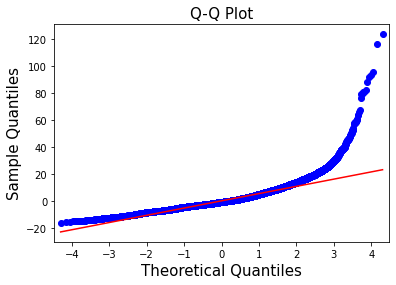

In [ ]:
qqplot(linreg_full_model.resid, line = 'r')

plt.title('Q-Q Plot', fontsize = 15)
plt.xlabel('Theoretical Quantiles', fontsize = 15)
plt.ylabel('Sample Quantiles', fontsize = 15)

plt.show()

In [ ]:
# As some of the points are away from the diagonal line, we conclude that the residuals do not follow a normal distribution.

In [ ]:
# Jarque bera test
# H0: The data is normally distributed
# H1: The data is not normally distributed

stat, p_value = jarque_bera(linreg_full_model.resid) 
print('Test statistic:', stat)
print('P-Value:', p_value)

Test statistic: 928913.5791351818
P-Value: 0.0


In [ ]:
# Here, the p-value of the test is less than 0.05; 
# This implies the residuals are not normally distributed.

**Checking the p-values to know the insignificant variables**

In [ ]:
# insignificant variables
linreg_full_model_pvalues = pd.DataFrame(linreg_full_model.pvalues, columns=["P-Value"])

insignificant_variables = linreg_full_model_pvalues[linreg_full_model_pvalues['P-Value']  > 0.05]

insigni_var = insignificant_variables.index
insigni_var = insigni_var.to_list()
insigni_var

['type_Baby',
 'type_Beauty',
 'type_Books',
 'type_Kitchen',
 'type_Office Products',
 'type_PC Store',
 'type_Retail',
 'type_Sporting Goods',
 'item_Barcode Not Linked',
 'item_Barcode links multiple product ID',
 'item_Barcode links to wrong product ID',
 'item_Case Pack/Multi-Box Issues',
 'item_Customer Returns',
 'item_Detail Page Issue',
 'item_Expiration Date Issue',
 'item_High Unit Overage/Misship',
 'item_Internal_RBS_Requests',
 'item_No PO Found',
 'item_Title Update',
 'item_Wrong Temperature',
 'assigned_to_group_EDI4-CReturns- Pending tickets',
 'Building Location_Coventry ',
 'Building Location_Darlington ',
 'Building Location_Northamptonshire',
 'Building Location_Sutton-in-Ashfield ',
 'impact_4']

In [ ]:
# These are the insignificant variables because their p-value is greater than 0.05.
# Out of the 21 classes under 'type' , there are 9 types which are insignificant. Hence, it can be considered as redundant variable.
# Similarly for the variable 'building location' only 4 out of 25 are insignificant to the target variable. So wecan retain the variable.
# only impact column is insignificant.

**Model Evaluation**

**Overall F-Test & p-value of the Model**

In [ ]:
print(linreg_full_model.summary())

                            OLS Regression Results                            
Dep. Variable:                rbs_tat   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     483.6
Date:                Mon, 18 Oct 2021   Prob (F-statistic):               0.00
Time:                        12:58:46   Log-Likelihood:            -3.7140e+05
No. Observations:              118020   AIC:                         7.429e+05
Df Residuals:                  117951   BIC:                         7.436e+05
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [ ]:
# Ho: All β's are equal to zero (i.e. regression model is not significant)
# H1: At least one β is not equal to zero (i.e. regression model is significant)

# Prob (F-statistic): 0.00
# As, the p-value is less than 0.05, we accept the alternate hypothesis; i.e. the model is significant.

**Base Model Performance**

In [ ]:
train_pred = linreg_full_model.predict(X_train)
test_pred = linreg_full_model.predict(X_test)

**Compare Model Performances**

In [ ]:
cols = ['Model_Name', 'R-squared', 'Adj. R-squared', 'RMSE_train', 'RMSE_test']

# creating a empty dataframe of the colums
result_table = pd.DataFrame(columns = cols)

In [ ]:
MLR_full_model_metrics = pd.Series({'Model_Name': "MLR Full Model",
                     'R-squared': linreg_full_model.rsquared,
                     'Adj. R-squared': linreg_full_model.rsquared_adj,
                     'RMSE_train': rmse(y_train, train_pred),
                     'RMSE_test': rmse(y_test, test_pred)})

# append the values to the result table
result_table = result_table.append(MLR_full_model_metrics, ignore_index = True)

In [ ]:
result_table

,Model_Name,R-squared,Adj. R-squared,RMSE_train,RMSE_test
0,MLR Full Model,0.218028,0.217577,5.629293,5.589337


In [ ]:
# The model is not overfitting or underfitting.

**Outlier Analysis**

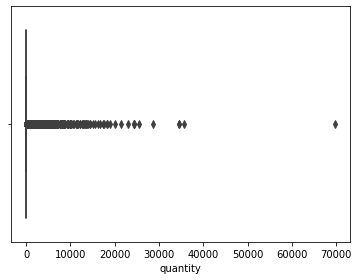

In [ ]:
plt.figure(figsize=(10,4))
j = 1

for i in num:
    plt.subplot(1,2,j)
    sns.boxplot(num[i])
    j+=1

plt.tight_layout()
plt.show()

In [ ]:
num.skew()

quantity    53.216412
dtype: float64

**Fine Tuning**

**Scaling & Transforming predictor and response variable**

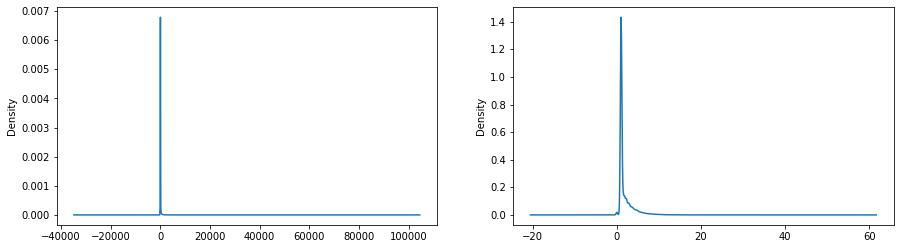

In [ ]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1);
df['quantity'].plot(kind='kde');

plt.subplot(1,2,2);
np.power(df['quantity'],1/3).plot(kind='kde');

In [ ]:
print('skewness without transformation: ', df['quantity'].skew())
print('skewness with cube transformation: ', np.power(df['quantity'],1/3).skew())

skewness without transformation:  53.21641226989964
skewness with cube transformation:  3.680677082378979


In [ ]:
df['quantity'] = np.power(df['quantity'],1/3)

In [ ]:
num = feature.select_dtypes(np.number)
cat = feature.select_dtypes(object)

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
num_sc = pd.DataFrame(ss.fit_transform(num), columns = num.columns)

from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
#num_pt = pd.DataFrame(pt.fit_transform(num), columns =num.columns)
#num_pt.reset_index(drop= True, inplace = True)

X1 = pd.concat([num_sc,encode],axis=1)
y1 = target.reset_index(drop=True)

In [ ]:
X1 = sm.add_constant(X1)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, np.sqrt(y1), random_state=10)

print("The shape of X_train is:",X1_train.shape)
print("The shape of X_test is:",X1_test.shape)
print("The shape of y_train is:",y1_train.shape)
print("The shape of y_test is:",y1_test.shape)

The shape of X_train is: (118020, 71)
The shape of X_test is: (39340, 71)
The shape of y_train is: (118020,)
The shape of y_test is: (39340,)


In [ ]:
X1_train.head(1)

,const,quantity,category_F3 EU ISS,category_iss,type_Automotive,type_Baby,type_Beauty,type_Books,type_Computers,type_EDI4 C-Returns,type_Footwear,type_Garden,type_Jewellery,type_Kitchen,type_Music,type_Office Products,type_PC Store,type_Personal Care Appliances,type_Pet,type_Prime Now,type_Retail,type_Sporting Goods,type_UK AmazonFresh,type_UK PrimeNow,type_Video Games,item_Barcode Not Linked,item_Barcode links multiple product ID,item_Barcode links to wrong product ID,item_Barcode not linked,item_Case Pack/Multi-Box Issues,item_Customer Returns,item_Detail Page Issue,item_Expiration Date Issue,item_Hazmat Flag- To Be Verified,item_High Unit Overage/Misship,item_Internal_RBS_Requests,item_Item Not In Catalog,item_No PO Found,item_Title Update,item_Vendor Compliance,item_Wrong Temperature,assigned_to_group_EDI4-CReturns- Pending tickets,assigned_to_group_ISS-UK-RBS,Building Location_Bedfordshire,Building Location_Bolton,Building Location_Chesterfield,Building Location_Coalville,Building Location_Coventry,Building Location_Darlington,Building Location_Doncaster,Building Location_Doncaster,Building Location_Dunstable,Building Location_Durham,Building Location_Hyderabad,Building Location_Kegworth,Building Location_Manchester,Building Location_Northamptonshire,Building Location_Peterborough,Building Location_Peterborough,Building Location_Pune,Building Location_Rugby,Building Location_Staffordshire,Building Location_Sutton-in-Ashfield,Building Location_Swansea,Building Location_Tilbury,Building Location_Twelvetrees Crescent,Building Location_Warrington,Building Location_Western Approach Distribution Park,impact_3,impact_4,impact_5
98307,1.0,-0.114358,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


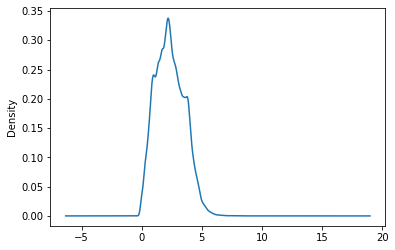

In [ ]:
np.sqrt(y1).plot(kind='kde')

In [ ]:
y1.skew()

1.8541496585346255

In [ ]:
print('Skewness before transformation: ',round(y1.skew(),4))
print('Skewness after transformation: ', round(np.sqrt(y1).skew(),4))

Skewness before transformation:  1.8541
Skewness after transformation:  0.3324


In [ ]:
linreg_trans_model = sm.OLS(y1_train, X1_train).fit()
print(linreg_trans_model.summary())

                            OLS Regression Results                            
Dep. Variable:                rbs_tat   R-squared:                       0.240
Model:                            OLS   Adj. R-squared:                  0.239
Method:                 Least Squares   F-statistic:                     539.6
Date:                Wed, 20 Oct 2021   Prob (F-statistic):               0.00
Time:                        13:49:51   Log-Likelihood:            -1.7207e+05
No. Observations:              118020   AIC:                         3.443e+05
Df Residuals:                  117950   BIC:                         3.450e+05
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [ ]:
# R- squared has increased from 19% to 21%

In [ ]:
# significant variables
linreg_trans_model_pvalues = pd.DataFrame(linreg_trans_model.pvalues, columns=["P-Value"])

insignificant_variables = linreg_trans_model_pvalues[linreg_trans_model_pvalues['P-Value']  > 0.05]

trans_insigni_var = insignificant_variables.index
trans_insigni_var = trans_insigni_var.to_list()
trans_insigni_var

['const',
 'type_Automotive',
 'type_Baby',
 'type_Beauty',
 'type_Books',
 'type_Garden',
 'type_Office Products',
 'type_PC Store',
 'type_Retail',
 'type_Sporting Goods',
 'item_Barcode Not Linked',
 'item_Barcode links multiple product ID',
 'item_Barcode links to wrong product ID',
 'item_Case Pack/Multi-Box Issues',
 'item_Customer Returns',
 'item_Detail Page Issue',
 'item_Expiration Date Issue',
 'item_Internal_RBS_Requests',
 'item_No PO Found',
 'item_Title Update',
 'item_Wrong Temperature',
 'assigned_to_group_EDI4-CReturns- Pending tickets',
 'assigned_to_group_ISS-UK-RBS',
 'Building Location_Coventry ',
 'Building Location_Darlington ',
 'Building Location_Durham ',
 'Building Location_Northamptonshire',
 'Building Location_Sutton-in-Ashfield ',
 'Building Location_Swansea',
 'impact_4',
 'impact_5']

In [ ]:
# These are the insignificant variables because their p-value is greater than 0.05.
# Out of the 21 classes under 'type' , there are 9 types which are insignificant. Hence, it can be considered as redundant variable.
# Similarly for the variable 'building location' only 6 out of 25 are insignificant to the target variable. So wecan retain the variable.
# Out out 3 impact columns, 2 are insignificant.

**Scaled and Transformed Model Performance**

In [ ]:
train_pred = np.square(linreg_trans_model.predict(X1_train))
test_pred = np.square(linreg_trans_model.predict(X1_test))

**Compare Model Performances**

In [ ]:
MLR_trans_model_metrics = pd.Series({'Model_Name': "MLR Transformed Model",
                     'R-squared': linreg_trans_model.rsquared,
                     'Adj. R-squared': linreg_trans_model.rsquared_adj,
                     'RMSE_train': rmse(y1_train, train_pred),
                     'RMSE_test': rmse(y1_test, test_pred)})

# append the values to the result table
result_table = result_table.append(MLR_trans_model_metrics, ignore_index = True)

In [ ]:
result_table

,Model_Name,R-squared,Adj. R-squared,RMSE_train,RMSE_test
0,MLR Full Model,0.218028,0.217577,5.629293,5.589337
1,MLR Transformed Model,0.239929,0.239484,4.276705,4.477901


**Significant Varibles from Transformed Model**

In [ ]:
feature1 = df[['category','item','assigned_to_group','Building Location','impact','quantity']]
target1 = df['rbs_tat']

num = feature1.select_dtypes(np.number)
cat = feature1.select_dtypes(object)

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
num_sc = pd.DataFrame(ss.fit_transform(num), columns = num.columns)
num_sc.reset_index(drop=True, inplace=True)

encode = pd.get_dummies(cat,drop_first=True)
encode.reset_index(drop=True, inplace=True)

X2 = pd.concat([num_sc,encode],axis=1)
y2 = target1.reset_index(drop=True)

X2 = sm.add_constant(X2)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, np.sqrt(y2), random_state=10)

print("The shape of X_train is:",X2_train.shape)
print("The shape of X_test is:",X2_test.shape)
print("The shape of y_train is:",y2_train.shape)
print("The shape of y_test is:",y2_test.shape)

The shape of X_train is: (118020, 50)
The shape of X_test is: (39340, 50)
The shape of y_train is: (118020,)
The shape of y_test is: (39340,)


In [ ]:
linreg_signi_model = sm.OLS(y2_train, X2_train).fit()
print(linreg_signi_model.summary())

                            OLS Regression Results                            
Dep. Variable:                rbs_tat   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.261
Method:                 Least Squares   F-statistic:                     867.7
Date:                Wed, 20 Oct 2021   Prob (F-statistic):               0.00
Time:                        13:50:28   Log-Likelihood:            -1.7042e+05
No. Observations:              118020   AIC:                         3.409e+05
Df Residuals:                  117971   BIC:                         3.414e+05
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [ ]:
#  Model built with significant variables from Scaled and transformed model is giving same R_squared value (21%).

**Significant Model Performance**

In [ ]:
train_pred = np.square(linreg_signi_model.predict(X2_train))
test_pred = np.square(linreg_signi_model.predict(X2_test))

**Compare Model Performances**

In [ ]:
MLR_signi_model_metrics = pd.Series({'Model_Name': "MLR Significant Model",
                     'R-squared': linreg_signi_model.rsquared,
                     'Adj. R-squared': linreg_signi_model.rsquared_adj,
                     'RMSE_train': rmse(y2_train, train_pred),
                     'RMSE_test': rmse(y2_test, test_pred)})

# append the values to the result table
result_table = result_table.append(MLR_signi_model_metrics, ignore_index = True)

In [ ]:
result_table

,Model_Name,R-squared,Adj. R-squared,RMSE_train,RMSE_test
0,MLR Full Model,0.218028,0.217577,5.629293,5.589337
1,MLR Transformed Model,0.239929,0.239484,4.276705,4.477901
2,MLR Significant Model,0.260925,0.260624,4.354438,4.361996


**RFE**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

linreg_rfe = LinearRegression()

rfe_model = RFE(estimator=linreg_rfe)

rfe_model = rfe_model.fit(X1_train, y1_train)

In [ ]:
rfe_model.score(X1_train, y1_train)

0.22920072622582954

In [ ]:
feat_index = pd.Series(data = rfe_model.ranking_, index = X1_train.columns)
signi_feat_rfe = feat_index[feat_index==1].index
print(len(signi_feat_rfe))

35


In [ ]:
linreg_rfe_model = sm.OLS(y1_train, X1_train[signi_feat_rfe]).fit()
print(linreg_rfe_model.summary())

                            OLS Regression Results                            
Dep. Variable:                rbs_tat   R-squared:                       0.229
Model:                            OLS   Adj. R-squared:                  0.229
Method:                 Least Squares   F-statistic:                     1032.
Date:                Wed, 20 Oct 2021   Prob (F-statistic):               0.00
Time:                        13:51:01   Log-Likelihood:            -1.7289e+05
No. Observations:              118020   AIC:                         3.459e+05
Df Residuals:                  117985   BIC:                         3.462e+05
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

**RFE Model Performance**

In [ ]:
train_pred = np.square(linreg_rfe_model.predict(X1_train[signi_feat_rfe]))
test_pred = np.square(linreg_rfe_model.predict(X1_test[signi_feat_rfe]))

**Compare Model Performances**

In [ ]:
MLR_rfe_model_metrics = pd.Series({'Model_Name': "MLR RFE Model",
                     'R-squared': linreg_rfe_model.rsquared,
                     'Adj. R-squared': linreg_rfe_model.rsquared_adj,
                     'RMSE_train': rmse(y1_train, train_pred),
                     'RMSE_test': rmse(y1_test, test_pred)})

# append the values to the result table
result_table = result_table.append(MLR_rfe_model_metrics, ignore_index = True)

In [ ]:
result_table

,Model_Name,R-squared,Adj. R-squared,RMSE_train,RMSE_test
0,MLR Full Model,0.218028,0.217577,5.629293,5.589337
1,MLR Transformed Model,0.239929,0.239484,4.276705,4.477901
2,MLR Significant Model,0.260925,0.260624,4.354438,4.361996
3,MLR RFE Model,0.229205,0.228982,4.246228,4.258277


**Ridge Regression**

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge(random_state = 10, max_iter = 500)
ridge_model = ridge.fit(X1_train,y1_train)

print('train score: ', ridge_model.score(X1_train, y1_train))

train score:  0.2399124077310544


In [ ]:
# from sklearn.model_selection import GridSearchCV
# tuned_paramaters = [{'alpha': [1e-15,1e-10,1e-8,1e-4,1e-3,1e-2,0.1,5,10,15,20,40,50]}]
# ridge = Ridge(random_state = 10, max_iter = 500)

# ridge_grid = GridSearchCV(estimator = ridge,param_grid = tuned_paramaters,cv = 10)
# ridge_grid_model = ridge_grid.fit(X1_train,y1_train)
# print('Best parameters for Ridge Regression:',ridge_grid_model.best_params_,'\n')

In [ ]:
ridge_tuned = Ridge(alpha = 0.1, random_state = 10, max_iter = 500)
ridge_tuned_model = ridge_tuned.fit(X1_train,y1_train)

print('train score: ', ridge_tuned_model.score(X1_train, y1_train))

train score:  0.23992770771364136


**Ridge GridSearch Model Performance**

In [ ]:
train_pred = np.square(ridge_tuned_model.predict(X1_train))
test_pred = np.square(ridge_tuned_model.predict(X1_test))

In [ ]:
def get_score(model):
    r_sq = model.score(X1_train, y1_train)
    n = X1_train.shape[0]
    k = X1_train.shape[1]
    
    r_sq_adj = 1 - ((1-r_sq)*(n-1)/(n-k-1)) 
    return ([r_sq, r_sq_adj])

**Compare Model Performances**

In [ ]:
MLR_ridge_model_metrics = pd.Series({'Model_Name': "MLR Ridge GridSearch Model",
                     'R-squared': get_score(ridge_tuned_model)[0],
                     'Adj. R-squared': get_score(ridge_tuned_model)[1],
                     'RMSE_train': rmse(y1_train, train_pred),
                     'RMSE_test': rmse(y1_test, test_pred)})

# append the values to the result table
result_table = result_table.append(MLR_ridge_model_metrics, ignore_index = True)

In [ ]:
result_table

,Model_Name,R-squared,Adj. R-squared,RMSE_train,RMSE_test
0,MLR Full Model,0.218028,0.217577,5.629293,5.589337
1,MLR Transformed Model,0.239929,0.239484,4.276705,4.477901
2,MLR Significant Model,0.260925,0.260624,4.354438,4.361996
3,MLR RFE Model,0.229205,0.228982,4.246228,4.258277
4,MLR Ridge GridSearch Model,0.239928,0.239470,4.276627,4.477786


**Lasso Regression**

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0.01, random_state = 10, max_iter = 500)
lasso_model = lasso.fit(X1_train,y1_train)

print('train score: ', lasso_model.score(X1_train, y1_train))

train score:  0.19735636094973733


In [ ]:
# tuned_paramaters = [{'alpha':[1e-15,1e-10,1e-8,0.0001,0.001,0.01,0.1,1,5,10,20]}]
# lasso = Lasso(random_state = 10, max_iter = 500)

# lasso_grid = GridSearchCV(estimator = lasso, param_grid = tuned_paramaters, cv = 10)
# lasso_grid_model = lasso_grid.fit(X1_train,y1_train)
# print('Best parameters for Ridge Regression:',lasso_grid_model.best_params_,'\n')

In [ ]:
lasso_tuned = Lasso(alpha = 1e-15, random_state = 10, max_iter = 500)
lasso_tuned_model = lasso_tuned.fit(X1_train,y1_train)

print('train score: ', lasso_tuned_model.score(X1_train, y1_train))

train score:  0.23991021733375628


**Lasso GridSearch Model Performance**

In [ ]:
train_pred = np.square(lasso_tuned_model.predict(X1_train))
test_pred = np.square(lasso_tuned_model.predict(X1_test))

**Compare Model Performances**

In [ ]:
MLR_lasso_model_metrics = pd.Series({'Model_Name': "MLR Lasso GridSearch Model",
                     'R-squared': get_score(lasso_tuned_model)[0],
                     'Adj. R-squared': get_score(lasso_tuned_model)[1],
                     'RMSE_train': rmse(y1_train, train_pred),
                     'RMSE_test': rmse(y1_test, test_pred)})

# append the values to the result table
result_table = result_table.append(MLR_lasso_model_metrics, ignore_index = True)

In [ ]:
result_table

,Model_Name,R-squared,Adj. R-squared,RMSE_train,RMSE_test
0,MLR Full Model,0.218028,0.217577,5.629293,5.589337
1,MLR Transformed Model,0.239929,0.239484,4.276705,4.477901
2,MLR Significant Model,0.260925,0.260624,4.354438,4.361996
3,MLR RFE Model,0.229205,0.228982,4.246228,4.258277
4,MLR Ridge GridSearch Model,0.239928,0.239470,4.276627,4.477786
5,MLR Lasso GridSearch Model,0.239910,0.239453,4.276686,4.477563


**Decision Tree Regressor**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import classification_report

In [ ]:
dt_reg = DecisionTreeRegressor(random_state = 10)

dt_reg_model = dt_reg.fit(X1_train, y1_train)

**Decision Tree Regressor Model Performance**

In [ ]:
train_pred = np.square(dt_reg_model.predict(X1_train))
test_pred = np.square(dt_reg_model.predict(X1_test))

**Compare Model Performances**

In [ ]:
dtreg_model_metrics = pd.Series({'Model_Name': "Decision Tree Regressor Model",
                     'R-squared': get_score(dt_reg_model)[0],
                     'Adj. R-squared': get_score(dt_reg_model)[1],
                     'RMSE_train': rmse(y1_train, train_pred),
                     'RMSE_test': rmse(y1_test, test_pred)})

# append the values to the result table
result_table = result_table.append(dtreg_model_metrics, ignore_index = True)

In [ ]:
result_table

,Model_Name,R-squared,Adj. R-squared,RMSE_train,RMSE_test
0,MLR Full Model,0.218028,0.217577,5.629293,5.589337
1,MLR Transformed Model,0.239929,0.239484,4.276705,4.477901
2,MLR Significant Model,0.260925,0.260624,4.354438,4.361996
3,MLR RFE Model,0.229205,0.228982,4.246228,4.258277
4,MLR Ridge GridSearch Model,0.239928,0.239470,4.276627,4.477786
5,MLR Lasso GridSearch Model,0.239910,0.239453,4.276686,4.477563
6,Decision Tree Regressor Model,0.534849,0.534569,5.463847,5.989580


In [ ]:
# A fully grown decision tree will over fit the train data.
# Fine tuning can be done to prune the growth of decision tree regressor.

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# hyperparameters = [{'criterion': ['squared_error', 'mse'], 
#                       'max_depth': [10,20,25,30],
#                       'min_samples_split': [7,10,12,15,20],
#                       'min_samples_leaf': [7,10,12,15,20]}]

# dt_reg = DecisionTreeRegressor(random_state= 10)
# dt_reg_grid = GridSearchCV(estimator = dt_reg, param_grid = hyperparameters, cv = 5)

# dt_reg_grid.fit(X1_train, y1_train)

# hyperparameter_dt = dt_reg_grid.best_params_
# print("The best hyperparameter is {} with score of {}".format(hyperparameter_dt,dt_reg_grid.best_score_))

In [ ]:
dt_reg_tuned = DecisionTreeRegressor(criterion = 'mse', max_depth =10, min_samples_leaf = 15, min_samples_split = 7, random_state = 10)

dt_reg_tuned_model = dt_reg_tuned.fit(X1_train, y1_train)

**Decision Tree Regressor GridSearch Model Performance**

In [ ]:
train_pred = np.square(dt_reg_tuned_model.predict(X1_train))
test_pred = np.square(dt_reg_tuned_model.predict(X1_test))

**Compare Model Performances**

In [ ]:
dtreg_tuned_model_metrics = pd.Series({'Model_Name': "Decision Tree Regressor GridSearch Model",
                     'R-squared': get_score(dt_reg_tuned_model)[0],
                     'Adj. R-squared': get_score(dt_reg_tuned_model)[1],
                     'RMSE_train': rmse(y1_train, train_pred),
                     'RMSE_test': rmse(y1_test, test_pred)})

# append the values to the result table
result_table = result_table.append(dtreg_tuned_model_metrics, ignore_index = True)

In [ ]:
result_table

,Model_Name,R-squared,Adj. R-squared,RMSE_train,RMSE_test
0,MLR Full Model,0.218028,0.217577,5.629293,5.589337
1,MLR Transformed Model,0.239929,0.239484,4.276705,4.477901
2,MLR Significant Model,0.260925,0.260624,4.354438,4.361996
3,MLR RFE Model,0.229205,0.228982,4.246228,4.258277
4,MLR Ridge GridSearch Model,0.239928,0.239470,4.276627,4.477786
5,MLR Lasso GridSearch Model,0.239910,0.239453,4.276686,4.477563
6,Decision Tree Regressor Model,0.534849,0.534569,5.463847,5.989580
7,Decision Tree Regressor GridSearch Model,0.289841,0.289414,4.430949,4.447641


**Random Forest Regressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(random_state = 10)

rf_reg_model = rf_reg.fit(X1_train, y1_train)

**Random Forest Regressor Model Performance**

In [ ]:
train_pred = np.square(rf_reg_model.predict(X1_train))
test_pred = np.square(rf_reg_model.predict(X1_test))

In [ ]:
rf_reg_model_metrics = pd.Series({'Model_Name': "Random Forest Regressor Model",
                     'R-squared': get_score(rf_reg_model)[0],
                     'Adj. R-squared': get_score(rf_reg_model)[1],
                     'RMSE_train': rmse(y1_train, train_pred),
                     'RMSE_test': rmse(y1_test, test_pred)})

# append the values to the result table
result_table = result_table.append(rf_reg_model_metrics, ignore_index = True)

In [ ]:
result_table

,Model_Name,R-squared,Adj. R-squared,RMSE_train,RMSE_test
0,MLR Full Model,0.218028,0.217577,5.629293,5.589337
1,MLR Transformed Model,0.239929,0.239484,4.276705,4.477901
2,MLR Significant Model,0.260925,0.260624,4.354438,4.361996
3,MLR RFE Model,0.229205,0.228982,4.246228,4.258277
4,MLR Ridge GridSearch Model,0.239928,0.239470,4.276627,4.477786
5,MLR Lasso GridSearch Model,0.239910,0.239453,4.276686,4.477563
6,Decision Tree Regressor Model,0.534849,0.534569,5.463847,5.989580
7,Decision Tree Regressor GridSearch Model,0.289841,0.289414,4.430949,4.447641
8,Random Forest Regressor Model,0.505156,0.504859,4.934739,4.995284


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# hyperparameters = [{'criterion': ['squared_error', 'mse'], 
#                       'max_depth': [10,20,25,30],
#                       'min_samples_split': [10,12,25,30],
#                       'min_samples_leaf': [10,12,25,30],
#                    'n_estimators': [50, 70, 90]}]

# rf_reg = RandomForestRegressor(random_state= 10)
# rf_reg_grid = RandomizedSearchCV(estimator = rf_reg, param_distributions= hyperparameters, cv = 5)

# rf_reg_grid.fit(X1_train, y1_train)

# hyperparameter_rf = rf_reg_grid.best_params_
# print("The best hyperparameter is {} with score of {}".format(hyperparameter_rf,rf_reg_grid.best_score_))

In [ ]:
rf_reg_tuned = RandomForestRegressor(n_estimators= 50, criterion = 'mse', max_depth =20, min_samples_leaf = 12, min_samples_split = 25, random_state = 10)

rf_reg_tuned_model = rf_reg_tuned.fit(X1_train, y1_train)

**Random Forest Regressor GridSearch Model Performance**

In [ ]:
train_pred = np.square(rf_reg_tuned_model.predict(X1_train))
test_pred = np.square(rf_reg_tuned_model.predict(X1_test))

**Compare Model Performances**

In [ ]:
rf_reg_tuned_model_metrics = pd.Series({'Model_Name': "Random Forest Regressor GridSearch Model",
                     'R-squared': get_score(rf_reg_tuned_model)[0],
                     'Adj. R-squared': get_score(rf_reg_tuned_model)[1],
                     'RMSE_train': rmse(y1_train, train_pred),
                     'RMSE_test': rmse(y1_test, test_pred)})

# append the values to the result table
result_table = result_table.append(rf_reg_tuned_model_metrics, ignore_index = True)

In [ ]:
result_table

,Model_Name,R-squared,Adj. R-squared,RMSE_train,RMSE_test
0,MLR Full Model,0.218028,0.217577,5.629293,5.589337
1,MLR Transformed Model,0.239929,0.239484,4.276705,4.477901
2,MLR Significant Model,0.260925,0.260624,4.354438,4.361996
3,MLR RFE Model,0.229205,0.228982,4.246228,4.258277
4,MLR Ridge GridSearch Model,0.239928,0.239470,4.276627,4.477786
5,MLR Lasso GridSearch Model,0.239910,0.239453,4.276686,4.477563
6,Decision Tree Regressor Model,0.534849,0.534569,5.463847,5.989580
7,Decision Tree Regressor GridSearch Model,0.289841,0.289414,4.430949,4.447641
8,Random Forest Regressor Model,0.505156,0.504859,4.934739,4.995284
9,Random Forest Regressor GridSearch Model,0.323653,0.323246,4.467232,4.500069


**Xgboost Regressor**

In [ ]:
from xgboost import XGBRegressor
#from sklearn.metrics import classification_report

In [ ]:
xgb_reg = XGBRegressor(objective ='reg:squarederror',
                  n_estimators = 2000, seed = 10)

xgb_reg_model = xgb_reg.fit(X1_train, y1_train)

**XGBoost Regressor Model Performance**

In [ ]:
train_pred = np.square(xgb_reg_model.predict(X1_train))
test_pred = np.square(xgb_reg_model.predict(X1_test))

**Compare Model Performances**

In [ ]:
xgb_reg_model_metrics = pd.Series({'Model_Name': "XGBoost Regressor Model",
                     'R-squared': get_score(xgb_reg_model)[0],
                     'Adj. R-squared': get_score(xgb_reg_model)[1],
                     'RMSE_train': rmse(y1_train, train_pred),
                     'RMSE_test': rmse(y1_test, test_pred)})

# append the values to the result table
result_table = result_table.append(xgb_reg_model_metrics, ignore_index = True)

In [ ]:
result_table

,Model_Name,R-squared,Adj. R-squared,RMSE_train,RMSE_test
0,MLR Full Model,0.218028,0.217577,5.629293,5.589337
1,MLR Transformed Model,0.239929,0.239484,4.276705,4.477901
2,MLR Significant Model,0.260925,0.260624,4.354438,4.361996
3,MLR RFE Model,0.229205,0.228982,4.246228,4.258277
4,MLR Ridge GridSearch Model,0.239928,0.239470,4.276627,4.477786
5,MLR Lasso GridSearch Model,0.239910,0.239453,4.276686,4.477563
6,Decision Tree Regressor Model,0.534849,0.534569,5.463847,5.989580
7,Decision Tree Regressor GridSearch Model,0.289841,0.289414,4.430949,4.447641
8,Random Forest Regressor Model,0.505156,0.504859,4.934739,4.995284
9,Random Forest Regressor GridSearch Model,0.323653,0.323246,4.467232,4.500069


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# hyperparameters = [{'objective':['reg:squarederror'],
#                     'alpha': [0.2, 0.3, 0.4,0.5,0.6],
#                      'max_depth': [3,4,5,7,11],
#                      'gamma': [1,2,3,4],
#                     'n_estimators' : [1000, 2000]}]

# xgb_reg = XGBRegressor()

# xgb_reg_grid_model = RandomizedSearchCV(estimator = xgb_reg, param_distributions = hyperparameters, cv = 5, scoring = 'r2')


# xgb_reg_grid_model.fit(X1_train, y1_train)

# hyperparameter_xgb = xgb_reg_grid_model.best_params_
# print("The best hyperparameter is {} with score of {}".format(hyperparameter_xgb,xgb_reg_grid_model.best_score_))

In [ ]:
xgb_reg_tuned = XGBRegressor(objective ='reg:squarederror', n_estimators = 2000, max_depth = 5, gamma =1, alpha = 0.2)

xgb_reg_tuned_model = xgb_reg_tuned.fit(X1_train, y1_train)

**XGBoost Regressor GridSearch Model Performance**

In [ ]:
train_pred = np.square(xgb_reg_tuned_model.predict(X1_train))
test_pred = np.square(xgb_reg_tuned_model.predict(X1_test))

In [ ]:
get_score(xgb_reg_tuned_model)[0]

0.31949738473817946

**Compare Model Performances**

In [ ]:
xgbreg_tuned_model_metrics = pd.Series({'Model_Name': "XGB Regressor GridSearch Model",
                     'R-squared': get_score(xgb_reg_tuned_model)[0],
                     'Adj. R-squared': get_score(xgb_reg_tuned_model)[1],
                     'RMSE_train': rmse(y1_train, train_pred),
                     'RMSE_test': rmse(y1_test, test_pred)})

# append the values to the result table
result_table = result_table.append(xgbreg_tuned_model_metrics, ignore_index = True)

In [ ]:
result_table

,Model_Name,R-squared,Adj. R-squared,RMSE_train,RMSE_test
0,MLR Full Model,0.218028,0.217577,5.629293,5.589337
1,MLR Transformed Model,0.239929,0.239484,4.276705,4.477901
2,MLR Significant Model,0.260925,0.260624,4.354438,4.361996
3,MLR RFE Model,0.229205,0.228982,4.246228,4.258277
4,MLR Ridge GridSearch Model,0.239928,0.239470,4.276627,4.477786
5,MLR Lasso GridSearch Model,0.239910,0.239453,4.276686,4.477563
6,Decision Tree Regressor Model,0.534849,0.534569,5.463847,5.989580
7,Decision Tree Regressor GridSearch Model,0.289841,0.289414,4.430949,4.447641
8,Random Forest Regressor Model,0.505156,0.504859,4.934739,4.995284
9,Random Forest Regressor GridSearch Model,0.323653,0.323246,4.467232,4.500069


**Cross Validation**

In [ ]:
# from sklearn.model_selection import cross_val_score
# scores = cross_val_score(estimator = xgb_reg_tuned, X = X1_train, y = y1_train, cv = 5, scoring = 'r2')
# print('All scores: ', scores)
# print("\nMinimum score obtained: ", round(min(scores), 4))
# print("Maximum score obtained: ", round(max(scores), 4))
# print("Average score obtained: ", round(np.mean(scores), 4))

**Classification**

In [ ]:
df['rbs_tat'].describe()

count    157360.00000
mean          6.94392
std           6.35270
min           0.00000
25%           2.04000
50%           5.12000
75%          10.33000
max         160.21000
Name: rbs_tat, dtype: float64

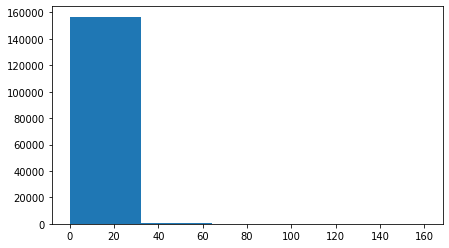

In [ ]:
plt.figure(figsize=(7,4))
plt.hist(df['rbs_tat'], bins =5);

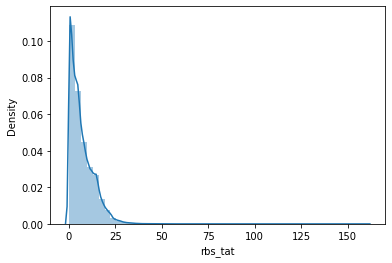

In [ ]:
sns.distplot(df['rbs_tat']);

In [ ]:
df1 = df.copy()
df1['rbs_tat_labels'] = pd.cut(df1['rbs_tat'], bins= [-1,12,160.21], labels= [0,1])

In [ ]:
df1['rbs_tat_labels'] = df1['rbs_tat_labels'].astype(np.number)

In [ ]:
df1['rbs_tat_labels'].value_counts()

0.0    126220
1.0     31140
Name: rbs_tat_labels, dtype: int64

In [ ]:
df1['rbs_tat_labels'].value_counts(normalize = True)*100

0.0    80.210981
1.0    19.789019
Name: rbs_tat_labels, dtype: float64

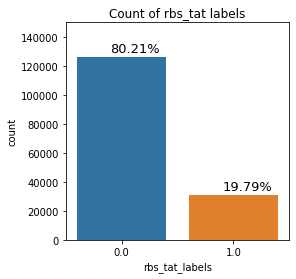

In [ ]:
plt.figure(figsize=(4,4))
sns.countplot(df1['rbs_tat_labels']);
plt.title('Count of rbs_tat labels');
plt.text(x=-0.1, y=df1['rbs_tat_labels'].value_counts()[0]+3000, s= '80.21%', size= 13);
plt.text(x=0.90, y=df1['rbs_tat_labels'].value_counts()[1]+3000, s= '19.79%', size= 13);
plt.ylim(0,150000);

**Chisquare test for checking dependence of feature and target**

In [ ]:
from scipy import stats
from prettytable import PrettyTable

In [ ]:
cate = df[['category','type','item','assigned_to_group','Building Location','impact']]

t = PrettyTable(['Column Name', 'P Values', 'Interpretation'])

for col in cate:
    tab = pd.crosstab(df[col],df['rbs_tat_labels'],margins = False)
    stat, p, dof, expected = stats.chi2_contingency(tab)
    if p<0.05:
        cm = 'Significant'
    else:
        cm = 'Not Significant'
    t.add_row([col,p,cm ])
print(t)

+-------------------+----------+----------------+
|    Column Name    | P Values | Interpretation |
+-------------------+----------+----------------+
|      category     |   0.0    |  Significant   |
|        type       |   0.0    |  Significant   |
|        item       |   0.0    |  Significant   |
| assigned_to_group |   0.0    |  Significant   |
| Building Location |   0.0    |  Significant   |
|       impact      |   0.0    |  Significant   |
+-------------------+----------+----------------+



**Anova for quantity column and rbs_tat_label**

In [ ]:
from scipy import stats
from prettytable import PrettyTable
from scipy.stats import kruskal

In [ ]:
t = PrettyTable(['Column Name', 'P Values', 'Interpretation'])
col1=df1[df1['rbs_tat_labels']== 0]['quantity']
col2=df1[df1['rbs_tat_labels']== 1]['quantity']

stat,pval=kruskal(col1,col2) 
if pval<0.05:
  cm = 'Significant'
else:
  cm = 'Not Significant'
t.add_row(['quantity',pval,cm ])
print(t)

+-------------+----------+----------------+
| Column Name | P Values | Interpretation |
+-------------+----------+----------------+
|   quantity  |   0.0    |  Significant   |
+-------------+----------+----------------+


**Dummy Encoding**

In [ ]:
feature11 = df1[['category','type','item','assigned_to_group','Building Location','impact','quantity']]
target11 = df1['rbs_tat_labels']

num11 = feature11.select_dtypes(np.number)
cat11 = feature11.select_dtypes(object)

num11.reset_index(drop=True, inplace=True)

encode11 = pd.get_dummies(cat11,drop_first=True)
encode11.reset_index(drop=True, inplace=True)

X11 = pd.concat([num11,encode11],axis=1)
y11 = target11.reset_index(drop=True)

In [ ]:
X11_train, X11_test, y11_train, y11_test = train_test_split(X11, y11, test_size =.25, random_state=10)

print("The shape of X_train is:",X11_train.shape)
print("The shape of X_test is:",X11_test.shape)
print("The shape of y_train is:",y11_train.shape)
print("The shape of y_test is:",y11_test.shape)

The shape of X_train is: (118020, 70)
The shape of X_test is: (39340, 70)
The shape of y_train is: (118020,)
The shape of y_test is: (39340,)


**Are X train and X test similar to eachother?**

In [ ]:
from scipy import stats
var = 0
for i in range(70):
    if stats.ttest_ind(X_train.iloc[:,i],X_test.iloc[:,i])[1] < 0.05:
        var = var+1
        print('there is strong variation in: ', X_train.columns[i])
if var ==0:
    print('X test and X train have similar type of data')

there is strong variation in:  item_Barcode links to wrong product ID
there is strong variation in:  Building Location_Swansea


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

In [ ]:
from matplotlib.colors import ListedColormap

def plot_cm_test(model):
    y_test_pred = model.predict(X11_test)
    cm = confusion_matrix(y11_test, y_test_pred)
    conf_matrix = pd.DataFrame(data = cm, columns = ['predicted:0-12','predicted:>12'], 
                               index = ['actual:0-12','actual:>12'])
    sns.heatmap(conf_matrix, annot=True, fmt ='d',cbar=False,cmap = ListedColormap(['pink']), annot_kws = {'size':15}, linewidths = 0.1)
    plt.show()

In [ ]:
def plot_test_roc(model):
    y_pred_prob = model.predict_proba(X11_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y11_test, y_pred_prob)

    plt.plot(fpr, tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.plot([0, 1], [0, 1],'r--')
    plt.title('ROC curve', fontsize = 12)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 12)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 12)
    plt.text(x = 0.1, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y11_test, y_pred_prob),4)))
    plt.grid(True)

**DecisionTreeClassifier**

In [ ]:
dt = DecisionTreeClassifier(random_state = 10)
dt_model = dt.fit(X11_train,y11_train)

ypred_train = dt_model.predict(X11_train)
ypred_test = dt_model.predict(X11_test)

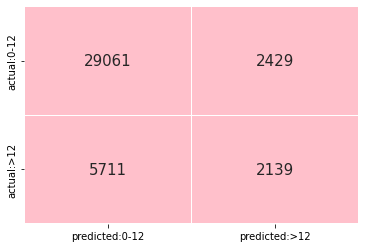

In [ ]:
plot_cm_test(dt_model)

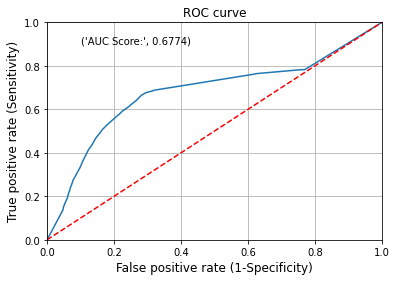

In [ ]:
plot_test_roc(dt_model)

In [ ]:
print('dt_model train report: \n',classification_report(y11_train,ypred_train))
print('dt_model test report: \n',classification_report(y11_test,ypred_test))

dt_model train report: 
               precision    recall  f1-score   support

         0.0       0.88      0.98      0.93     94730
         1.0       0.83      0.46      0.59     23290

    accuracy                           0.88    118020
   macro avg       0.86      0.72      0.76    118020
weighted avg       0.87      0.88      0.86    118020

dt_model test report: 
               precision    recall  f1-score   support

         0.0       0.84      0.92      0.88     31490
         1.0       0.47      0.27      0.34      7850

    accuracy                           0.79     39340
   macro avg       0.65      0.60      0.61     39340
weighted avg       0.76      0.79      0.77     39340



**DecisionTreeClassifier GridSearch Model**

In [ ]:
# from sklearn.model_selection import GridSearchCV
# tuned_paramaters = [{'criterion': ['entropy', 'gini'], 
#                      'max_depth': [3,5,7,10],
#                      'min_samples_split': [5,15,20],
#                      'min_samples_leaf': [5,15,20]}]
 
# dt_grid = DecisionTreeClassifier(random_state = 10)

# dt_grid_model = GridSearchCV(estimator = dt_grid, 
#                          param_grid = tuned_paramaters, 
#                          cv = 5, scoring = 'f1_weighted')
# dt_grid_model.fit(X11_train, y11_train)
# print('Best parameters for decision tree classifier: ', dt_grid_model.best_params_, '\n')

Best parameters for decision tree classifier:  {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 5, 'min_samples_split': 20} 



In [ ]:
dt_tuned = DecisionTreeClassifier(criterion = 'entropy' , max_depth = 7, min_samples_split = 20, min_samples_leaf = 5, random_state = 10,
                                  class_weight={0:1,1:10})
dt_tuned_model = dt_tuned.fit(X11_train,y11_train)

ypred_train = dt_tuned_model.predict(X11_train)
ypred_test = dt_tuned_model.predict(X11_test)

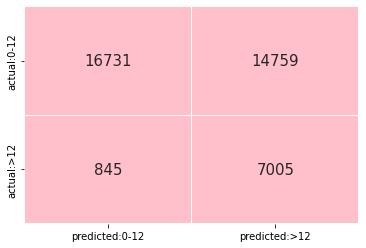

In [ ]:
plot_cm_test(dt_tuned_model)

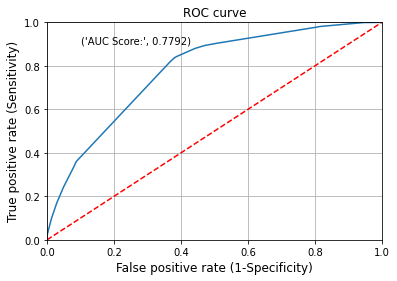

In [ ]:
plot_test_roc(dt_tuned_model)

In [ ]:
print('dt_tuned_model train report: \n',classification_report(y11_train,ypred_train))
print('dt_tuned_model test report: \n',classification_report(y11_test,ypred_test))

dt_tuned_model train report: 
               precision    recall  f1-score   support

         0.0       0.95      0.53      0.68     94730
         1.0       0.32      0.89      0.47     23290

    accuracy                           0.60    118020
   macro avg       0.64      0.71      0.58    118020
weighted avg       0.83      0.60      0.64    118020

dt_tuned_model test report: 
               precision    recall  f1-score   support

         0.0       0.95      0.53      0.68     31490
         1.0       0.32      0.89      0.47      7850

    accuracy                           0.60     39340
   macro avg       0.64      0.71      0.58     39340
weighted avg       0.83      0.60      0.64     39340



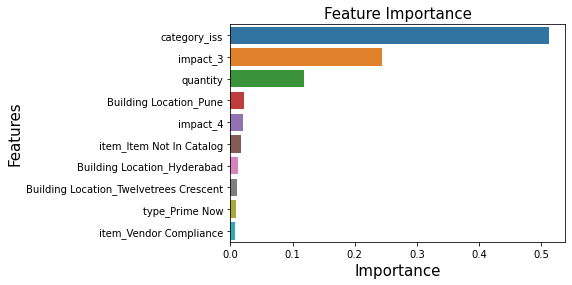

In [ ]:
important_features = pd.DataFrame({'Features': X11_train.columns, 
                                   'Importance': dt_tuned_model.feature_importances_})

important_features = important_features.sort_values('Importance', ascending = False)
important_features = important_features.reset_index(drop = True)
important_features = important_features.head(10)

sns.barplot(x = 'Importance', y = 'Features', data = important_features)
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)
plt.show()

**RandomForestClassifier Base Model**

In [ ]:
rf = RandomForestClassifier(random_state= 10)
rf_model = rf.fit(X11_train,y11_train)

ypred_train = rf_model.predict(X11_train)
ypred_test = rf_model.predict(X11_test)

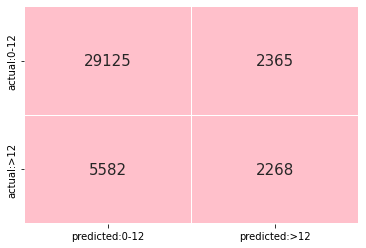

In [ ]:
plot_cm_test(rf_model)

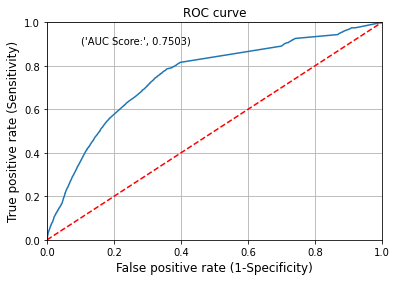

In [ ]:
plot_test_roc(rf_model)

In [ ]:
print('rf_model train report: \n',classification_report(y11_train,ypred_train))
print('rf_model test report: \n',classification_report(y11_test,ypred_test))

rf_model train report: 
               precision    recall  f1-score   support

         0.0       0.89      0.97      0.93     94730
         1.0       0.80      0.49      0.61     23290

    accuracy                           0.88    118020
   macro avg       0.84      0.73      0.77    118020
weighted avg       0.87      0.88      0.86    118020

rf_model test report: 
               precision    recall  f1-score   support

         0.0       0.84      0.92      0.88     31490
         1.0       0.49      0.29      0.36      7850

    accuracy                           0.80     39340
   macro avg       0.66      0.61      0.62     39340
weighted avg       0.77      0.80      0.78     39340



**RandomForestClassifier RandomizedSearch CV**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# hyperparameters = [{'criterion': ['entropy', 'gini'], 
#                       'max_depth': [10,15,20],
#                       'min_samples_split': [10,15,25],
#                       'min_samples_leaf': [10,15,25]}]

# rf = RandomForestClassifier(random_state= 10)
# rf_grid = RandomizedSearchCV(estimator = rf, param_distributions= hyperparameters, cv = 5)

# rf_grid.fit(X11_train, y11_train)

# hyperparameter_rf = rf_grid.best_params_
# print("The best hyperparameter is {} with score of {}".format(hyperparameter_rf, rf_grid.best_score_))

The best hyperparameter is {'min_samples_split': 25, 'min_samples_leaf': 10, 'max_depth': 20, 'criterion': 'gini'} with score of 0.8147263175732927


**RandomForestClassifier with balanced class weight**

In [ ]:
rf_tuned = RandomForestClassifier(n_estimators=3500,class_weight='balanced', max_depth = 20, min_samples_split =25 , min_samples_leaf = 10, criterion = 'gini' )
rf_tuned_model = rf_tuned.fit(X11_train,y11_train)

ypred_train = rf_tuned_model.predict(X11_train)
ypred_test = rf_tuned_model.predict(X11_test)

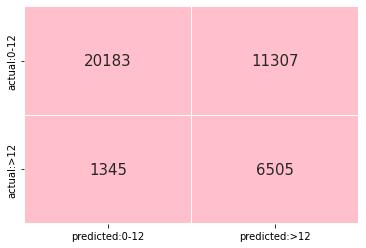

In [ ]:
plot_cm_test(rf_tuned_model)

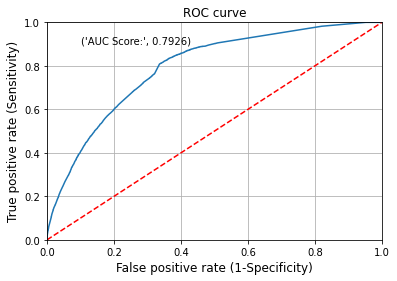

In [ ]:
plot_test_roc(rf_tuned_model)

In [ ]:
print('rf_tuned_model balanced weight train report: \n',classification_report(y11_train,ypred_train))
print('rf_tuned_model balanced weight test report: \n',classification_report(y11_test,ypred_test))

rf_tuned_model balanced weight train report: 
               precision    recall  f1-score   support

         0.0       0.94      0.65      0.77     94730
         1.0       0.37      0.83      0.51     23290

    accuracy                           0.68    118020
   macro avg       0.65      0.74      0.64    118020
weighted avg       0.83      0.68      0.72    118020

rf_tuned_model balanced weight test report: 
               precision    recall  f1-score   support

         0.0       0.94      0.64      0.76     31490
         1.0       0.37      0.83      0.51      7850

    accuracy                           0.68     39340
   macro avg       0.65      0.73      0.63     39340
weighted avg       0.82      0.68      0.71     39340



In [ ]:
from sklearn.model_selection import cross_val_score
scores_train = cross_val_score(rf_tuned, X11_train, y11_train, cv= 3, scoring= 'f1_weighted')

print('all scores: ',scores_train)

bias_err= 1-np.mean(scores_train)
variance_err=np.std(scores_train)/np.mean(scores_train)

print('Bias error: ',bias_err)
print('Variance error: ',variance_err)

all scores:  [0.71291656 0.71219197 0.7114182 ]
Bias error:  0.2878244213558442
Variance error:  0.0008590736844179694


**RandomForestClassifier with class 5 weight**

In [ ]:
rf_tuned = RandomForestClassifier(n_estimators=3500,class_weight={0:1,1:5}, max_depth = 20, min_samples_split =25 , 
                            min_samples_leaf = 10, criterion = 'gini' )
rf_tuned_model = rf_tuned.fit(X11_train,y11_train)

ypred_train = rf_tuned_model.predict(X11_train)
ypred_test = rf_tuned_model.predict(X11_test)

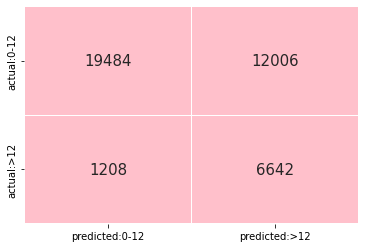

In [ ]:
plot_cm_test(rf_tuned_model)

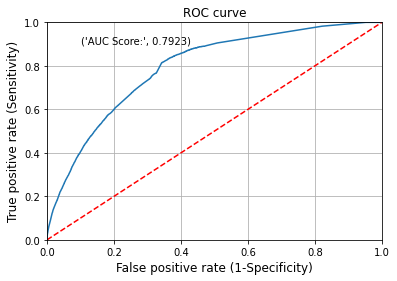

In [ ]:
plot_test_roc(rf_tuned_model)

In [ ]:
print('rf_tuned_model class weight 5 train report: \n',classification_report(y11_train,ypred_train))
print('rf_tuned_model class weight 5 test report: \n',classification_report(y11_test,ypred_test))

rf_tuned_model class weight 5 train report: 
               precision    recall  f1-score   support

         0.0       0.94      0.62      0.75     94730
         1.0       0.36      0.85      0.50     23290

    accuracy                           0.67    118020
   macro avg       0.65      0.74      0.63    118020
weighted avg       0.83      0.67      0.70    118020

rf_tuned_model class weight 5 test report: 
               precision    recall  f1-score   support

         0.0       0.94      0.62      0.75     31490
         1.0       0.36      0.85      0.50      7850

    accuracy                           0.66     39340
   macro avg       0.65      0.73      0.62     39340
weighted avg       0.82      0.66      0.70     39340



In [ ]:
from sklearn.model_selection import cross_val_score
scores_train = cross_val_score(rf_tuned, X11_train, y11_train, cv= 3, scoring= 'f1_weighted')

print('all scores: ',scores_train)

bias_err= 1-np.mean(scores_train)
variance_err=np.std(scores_train)/np.mean(scores_train)

print('Bias error: ',bias_err)
print('Variance error: ',variance_err)

all scores:  [0.69850009 0.69666303 0.69844993]
Bias error:  0.30212898234894014
Variance error:  0.0012243223301642461


**RandomForestClassifier with 10 class weight**

In [ ]:
rf_tuned = RandomForestClassifier(n_estimators=3500,class_weight={0:1,1:10}, max_depth = 20, min_samples_split =25 , 
                            min_samples_leaf = 10, criterion = 'gini' )
rf_tuned_model = rf_tuned.fit(X11_train,y11_train)

ypred_train = rf_tuned_model.predict(X11_train)
ypred_test = rf_tuned_model.predict(X11_test)

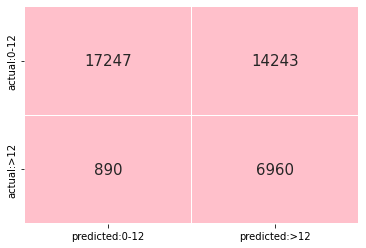

In [ ]:
plot_cm_test(rf_tuned_model)

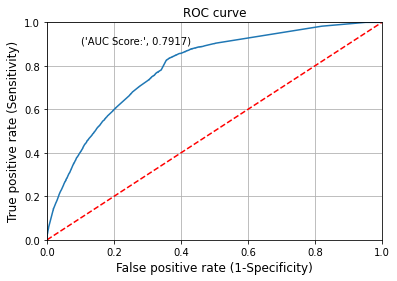

In [ ]:
plot_test_roc(rf_tuned_model)

In [ ]:
print('rf_tuned_model class weight 10 train report: \n',classification_report(y11_train,ypred_train))
print('rf_tuned_model class weight 10 test report: \n',classification_report(y11_test,ypred_test))

rf_tuned_model class weight 10 train report: 
               precision    recall  f1-score   support

         0.0       0.95      0.55      0.70     94730
         1.0       0.33      0.89      0.48     23290

    accuracy                           0.62    118020
   macro avg       0.64      0.72      0.59    118020
weighted avg       0.83      0.62      0.66    118020

rf_tuned_model class weight 10 test report: 
               precision    recall  f1-score   support

         0.0       0.95      0.55      0.70     31490
         1.0       0.33      0.89      0.48      7850

    accuracy                           0.62     39340
   macro avg       0.64      0.72      0.59     39340
weighted avg       0.83      0.62      0.65     39340



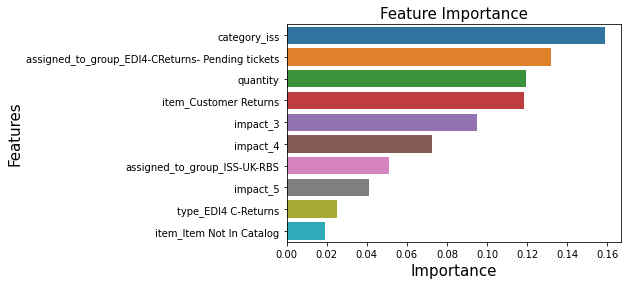

In [ ]:
important_features = pd.DataFrame({'Features': X11_train.columns, 
                                   'Importance': rf_tuned_model.feature_importances_})

important_features = important_features.sort_values('Importance', ascending = False)
important_features = important_features.reset_index(drop = True)
important_features = important_features.head(10)

sns.barplot(x = 'Importance', y = 'Features', data = important_features)
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
scores_train = cross_val_score(rf_tuned, X11_train, y11_train, cv= 3, scoring= 'f1_weighted')

print('all scores: ',scores_train)

bias_err= 1-np.mean(scores_train)
variance_err=np.std(scores_train)/np.mean(scores_train)

print('Bias error: ',bias_err)
print('Variance error: ',variance_err)

all scores:  [0.65760476 0.64947637 0.65409013]
Bias error:  0.34627624691153636
Variance error:  0.005091603053223054


**Ada Boost Model**

In [ ]:
ada = AdaBoostClassifier(n_estimators= 1000, random_state = 10)
ada_model = ada.fit(X11_train,y11_train)

ypred_train = ada_model.predict(X11_train)
ypred_test = ada_model.predict(X11_test)

In [ ]:
plot_test_roc(ada_model)

In [ ]:
print('ada_model train report: \n',classification_report(y11_train,ypred_train))
print('ada_model test report: \n',classification_report(y11_test,ypred_test))

ada_model train report: 
               precision    recall  f1-score   support

        0-12       0.83      0.96      0.89     94730
         >12       0.57      0.20      0.29     23290

    accuracy                           0.81    118020
   macro avg       0.70      0.58      0.59    118020
weighted avg       0.78      0.81      0.77    118020

ada_model test report: 
               precision    recall  f1-score   support

        0-12       0.83      0.96      0.89     31490
         >12       0.57      0.20      0.29      7850

    accuracy                           0.81     39340
   macro avg       0.70      0.58      0.59     39340
weighted avg       0.78      0.81      0.77     39340



In [ ]:
# ada_rf = RandomForestClassifier(class_weight={0:1,1:10}, max_depth = 20, min_samples_split =25, 
#                             min_samples_leaf = 10, criterion = 'gini' )

# ada = AdaBoostClassifier(base_estimator = ada_rf, n_estimators= 3500, random_state = 10)
# ada_model = ada.fit(X11_train,y11_train)

# ypred_train = ada_model.predict(X11_train)
# ypred_test = ada_model.predict(X11_test)

In [ ]:
print('ada_model with rf estimator train report: \n',classification_report(y11_train,ypred_train))
print('ada_model with rf estimator test report: \n',classification_report(y11_test,ypred_test))

**Gradient Boost Model**

In [ ]:
gb = GradientBoostingClassifier(n_estimators= 1000, random_state = 10)
gb_model = gb.fit(X11_train,y11_train)

ypred_train = gb_model.predict(X11_train)
ypred_test = gb_model.predict(X11_test)

In [ ]:
plot_test_roc(gb_model)

In [ ]:
print('gb_model train report: \n',classification_report(y11_train,ypred_train))
print('gb_model test report: \n',classification_report(y11_test,ypred_test))

gb_model train report: 
               precision    recall  f1-score   support

        0-12       0.83      0.97      0.90     94730
         >12       0.63      0.20      0.31     23290

    accuracy                           0.82    118020
   macro avg       0.73      0.59      0.60    118020
weighted avg       0.79      0.82      0.78    118020

gb_model test report: 
               precision    recall  f1-score   support

        0-12       0.83      0.97      0.89     31490
         >12       0.60      0.19      0.29      7850

    accuracy                           0.81     39340
   macro avg       0.71      0.58      0.59     39340
weighted avg       0.78      0.81      0.77     39340



**XGBoost Model**

In [ ]:
xgb = XGBClassifier(random_state=10)
xgb_model = xgb.fit(X11_train,y11_train)

ypred_train = xgb_model.predict(X11_train)
ypred_test = xgb_model.predict(X11_test)

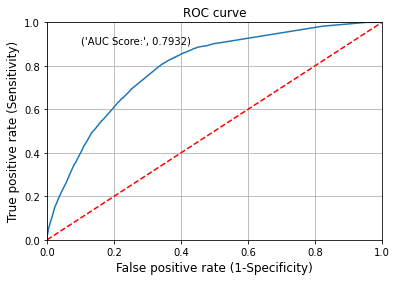

In [ ]:
plot_test_roc(xgb_model)

In [ ]:
print('xgb_model train report: \n',classification_report(y11_train,ypred_train))
print('xgb_model test report: \n',classification_report(y11_test,ypred_test))

xgb_model train report: 
               precision    recall  f1-score   support

        0-12       0.82      0.97      0.89     94730
         >12       0.60      0.16      0.25     23290

    accuracy                           0.81    118020
   macro avg       0.71      0.57      0.57    118020
weighted avg       0.78      0.81      0.77    118020

xgb_model test report: 
               precision    recall  f1-score   support

        0-12       0.82      0.97      0.89     31490
         >12       0.60      0.16      0.25      7850

    accuracy                           0.81     39340
   macro avg       0.71      0.57      0.57     39340
weighted avg       0.78      0.81      0.76     39340



**XGBoost RandomizedSearchCV Model**

In [ ]:
# from sklearn.model_selection import RandomizedSearchCV

# tuning_parameters = {'learning_rate': [0.2, 0.3],
#                      'max_depth': [9,12,15],
#                      'gamma': [2,3]}

# xgb_grid = XGBClassifier()

# xgb_grid_model = RandomizedSearchCV(estimator = xgb_grid, param_distributions = tuning_parameters, cv = 5, scoring = 'f1_weighted')

# xgb_grid_model.fit(X11_train, y11_train)


# print('Best parameters for XGBoost classifier: ', xgb_grid_model.best_params_, '\n')

Best parameters for XGBoost classifier:  {'max_depth': 15, 'learning_rate': 0.3, 'gamma': 2} 



In [ ]:
xgb_tuned = XGBClassifier(max_depth =15, learning_rate = 0.3, gamma = 2, n_estimators= 3500,class_weight={'0-12':1,'>12':10})
xgb_tuned_model = xgb_tuned.fit(X11_train,y11_train)

ypred_train = xgb_tuned_model.predict(X11_train)
ypred_test = xgb_tuned_model.predict(X11_test)

In [ ]:
print('xgb_tuned_model train report: \n',classification_report(y11_train,ypred_train))
print('xgb_tuned_model test report: \n',classification_report(y11_test,ypred_test))

xgb_tuned_model train report: 
               precision    recall  f1-score   support

         0.0       0.84      0.97      0.90     94730
         1.0       0.69      0.24      0.36     23290

    accuracy                           0.83    118020
   macro avg       0.77      0.61      0.63    118020
weighted avg       0.81      0.83      0.79    118020

xgb_tuned_model test report: 
               precision    recall  f1-score   support

         0.0       0.83      0.96      0.89     31490
         1.0       0.59      0.20      0.30      7850

    accuracy                           0.81     39340
   macro avg       0.71      0.58      0.60     39340
weighted avg       0.78      0.81      0.77     39340



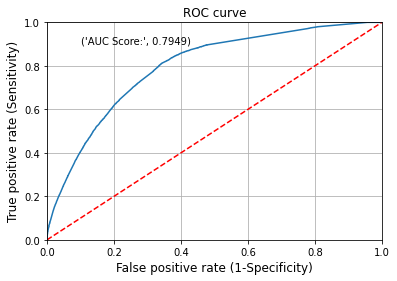

In [ ]:
plot_test_roc(xgb_tuned_model)

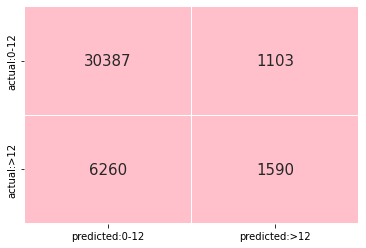

In [ ]:
plot_cm_test(xgb_tuned_model)

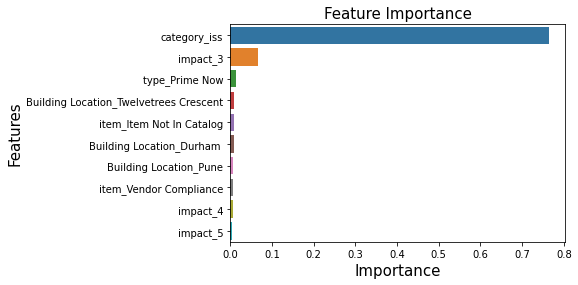

In [ ]:
important_features = pd.DataFrame({'Features': X11_train.columns, 
                                   'Importance': xgb_tuned_model.feature_importances_})

important_features = important_features.sort_values('Importance', ascending = False)
important_features = important_features.reset_index(drop = True)
important_features = important_features.head(10)

sns.barplot(x = 'Importance', y = 'Features', data = important_features)
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)
plt.show()

In [ ]:
important_features.head()

,Features,Importance
0,category_iss,0.764796
1,impact_3,0.065280
2,type_Prime Now,0.013202
3,Building Location_Twelvetrees Crescent,0.008922
4,item_Item Not In Catalog,0.008277


In [ ]:
from sklearn.model_selection import cross_val_score
scores_train = cross_val_score(xgb_tuned, X11_train, y11_train, cv= 3, scoring= 'f1_weighted')

print('all scores: ',scores_train)

bias_err= 1-np.mean(scores_train)
variance_err=np.std(scores_train)/np.mean(scores_train)

print('Bias error: ',bias_err)
print('Variance error: ',variance_err)

all scores:  [0.77335839 0.77351485 0.77400866]
Bias error:  0.22637270155519784
Variance error:  0.0003582112360079583
